<a href="https://colab.research.google.com/github/esradag/pytorch-derin-ogrenme/blob/main/Pytorch_%C3%96zel_Verisetleri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Özel Veri Setleri

Son notebookta, [notebook 03](https://www.learnpytorch.io/03_pytorch_computer_vision/) PyTorch'taki yerleşik bir veri seti (FashionMNIST) üzerinde bilgisayarla görme modelleri nasıl oluşturulacağına baktık.

Aldığımız adımlar, makine öğrenimindeki birçok farklı problemde benzerlik gösterir.

Bir veri seti bulun, veri setini sayılara dönüştürün, bu sayılarda desenler bulmak için bir model oluşturun (veya mevcut bir model bulun) ve bu desenleri tahmin için kullanın.

PyTorch, çok sayıda makine öğrenimi karşılaştırma testlerinde kullanılan yerleşik birçok veri setine sahiptir, ancak sıklıkla kendi **özel veri setinizi** kullanmak isteyeceksiniz.


## Özel Veri Seti Nedir?

Bir **özel veri seti**, üzerinde çalıştığınız belirli bir probleme ilişkin verilerin bir koleksiyonudur.

Özetle, bir **özel veri seti**, hemen hemen her şeyden oluşabilir.

Örneğin, [Nutrify](https://nutrify.app) gibi bir yiyecek görüntüsü sınıflandırma uygulaması oluşturuyor olsaydık, özel veri setimiz yiyecek görüntülerinden oluşabilir.

Ya da bir model oluşturup bir web sitesindeki metin tabanlı yorumun pozitif mi negatif mi olduğunu sınıflandırmaya çalışıyorsak, özel veri setimiz mevcut müşteri yorumları ve bunların puanlarından oluşabilir.

Ya da bir ses sınıflandırma uygulaması oluşturuyorsak, özel veri setimiz ses örnekleri ve bunların etiketleriyle birlikte olabilir.

Ya da müşterilerin web sitemizden satın aldıkları ürünleri öneren bir öneri sistemi kuruyorsak, özel veri setimiz, diğer kişilerin satın aldığı ürünlerin örneklerinden oluşabilir.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pytorch-domain-libraries.png" alt="farklı pytorch alan kütüphaneleri, belirli PyTorch problemleri için kullanılabilir" width=1000/>

*PyTorch, çeşitli özel veri setlerini yüklemek için birçok mevcut fonksiyon içerir. Bunlar [`TorchVision`](https://pytorch.org/vision/stable/index.html), [`TorchText`](https://pytorch.org/text/stable/index.html), [`TorchAudio`](https://pytorch.org/audio/stable/index.html) ve [`TorchRec`](https://pytorch.org/torchrec/) alan kütüphanelerinde bulunabilir.*

Ancak bazen bu mevcut fonksiyonlar yeterli olmayabilir.

Bu durumda, her zaman `torch.utils.data.Dataset` sınıfını alt sınıf olarak türetebilir ve ihtiyacımıza göre özelleştirebiliriz.


## Ne öğreneceğiz

PyTorch İş Akışını, [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/) ve [notebook 02](https://www.learnpytorch.io/02_pytorch_classification/) de incelediğimiz gibi bir bilgisayarla görme problemi üzerine uygulayacağız.

Ancak, yerleşik bir PyTorch veri seti kullanmak yerine, kendi **pizza, biftek ve suşi görüntülerinden oluşan veri setimizi** kullanacağız.

Hedefimiz bu görüntüleri yüklemek ve ardından bu görüntüler üzerinde eğitilecek ve tahmin yapılacak bir model inşa etmek olacak.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pytorch-food-vision-layout.png" alt="gıda görüntülerini yüklemek için bir pipeline oluşturma ve ardından bu gıda görüntülerini sınıflandırmak için bir pytorch modeli inşa etme" width=800 />

*Ne inşa edeceğiz. `torchvision.datasets` ve kendi özel `Dataset` sınıfımızı kullanarak gıda görüntülerini yükleyeceğiz ve ardından PyTorch bilgisayarla görme modeli inşa ederek onları sınıflandırmayı umacağız.*

Özellikle, şunları kapsayacağız:

| **Konu** | **İçerik** |
| ----- | ----- |
| **0. PyTorch'u İçe Aktarma ve Cihaz Bağımsız Kod Kurulumu** | PyTorch'u yükleyelim ve ardından en iyi uygulamayı takip ederek kodumuzu cihaz bağımsız hale getirelim. |
| **1. Veriyi Alma** | Kendi **özel veri setimiz** olan pizza, biftek ve suşi görüntülerini kullanacağız. |
| **2. Veriye Hakim Olma (veri hazırlığı)** | Her yeni makine öğrenimi problemi için verinizi anlamak çok önemlidir. Burada, elimizdeki veriyi anlamak için bazı adımlar atacağız. |
| **3. Veriyi Dönüştürme** | Genellikle, aldığınız veri, makine öğrenimi modeliyle kullanılmaya %100 hazır olmayabilir, burada görüntülerimizi bir modelle kullanılmaya hazır hale getirmek için bazı adımlar atacağız. |
| **4. `ImageFolder` ile Veriyi Yükleme (Seçenek 1)** | PyTorch, yaygın veri türleri için birçok yerleşik veri yükleme fonksiyonu sağlar. `ImageFolder`, görüntülerimiz standart görüntü sınıflandırma formatında ise yardımcı olur. |
| **5. Özel `Dataset` ile Görüntü Verisi Yükleme** | Ya PyTorch, veriyi yüklemek için yerleşik bir fonksiyon sağlamazsa? İşte bu noktada, `torch.utils.data.Dataset` sınıfımızı alt sınıf olarak türetip kendi veri yükleyicimizi oluşturabiliriz. |
| **6. Diğer Dönüşüm Türleri (veri artırma)** | Veri artırma, eğitim verinizin çeşitliliğini artırmak için yaygın bir tekniktir. Burada, `torchvision`'ın yerleşik veri artırma fonksiyonlarını keşfedeceğiz. |
| **7. Model 0: Veri Artırma Olmadan TinyVGG** | Bu aşamada verimiz hazır olacak, şimdi veriyi uyumlu hale getirebilecek bir model inşa edelim. Ayrıca modelimizi eğitmek ve değerlendirmek için bazı eğitim ve test fonksiyonları oluşturacağız. |
| **8. Kayıp Eğrilerini Keşfetme** | Kayıp eğrileri, modelinizin zaman içinde nasıl eğitildiğini ve geliştiğini görmenin harika bir yoludur. Ayrıca modelinizin **yetersiz uyum sağlama** veya **aşırı uyum sağlama** durumu hakkında bilgi verir. |
| **9. Model 1: Veri Artırma ile TinyVGG** | Şimdi, bir modeli *veri artırma olmadan* denedik, ya bir tane de *veri artırma ile* deneyelim? |
| **10. Model Sonuçlarını Karşılaştırma** | Farklı modellerimizin kayıp eğrilerini karşılaştıralım ve hangi modelin daha iyi performans gösterdiğini görelim ve performansı artırmak için bazı seçenekleri tartışalım. |
| **11. Özel Bir Görüntü Üzerinde Tahmin Yapma** | Modelimiz, pizza, biftek ve suşi görüntülerinden oluşan bir veri seti üzerinde eğitildi. Bu bölümde, eğittiğimiz modelin mevcut veri setimiz dışında bir görüntü üzerinde nasıl tahmin yapacağını göstereceğiz. |


## Nereden Yardım Alabilirsiniz?

Bu kursun tüm materyalleri [GitHub'da](https://github.com/mrdbourke/pytorch-deep-learning) yer almaktadır.

Bir sorunla karşılaşırsanız, kursun [GitHub Tartışma sayfasında](https://github.com/mrdbourke/pytorch-deep-learning/discussions) bir soru sorabilirsiniz.

Ve tabii ki, [PyTorch dokümantasyonu](https://pytorch.org/docs/stable/index.html) ve [PyTorch geliştirici forumları](https://discuss.pytorch.org/), PyTorch ile ilgili her şey için çok faydalı bir kaynaktır.


In [1]:
import torch
from torch import nn

# Not: Bu notebook, torch >= 1.10.0 sürümünü gerektirir
torch.__version__


'2.5.1+cu121'

Ve şimdi en iyi uygulamaları takip edelim ve cihaz bağımsız kod kurulumunu yapalım.

> **Not:** Eğer Google Colab kullanıyorsanız ve henüz bir GPU etkinleştirmediyseniz, şimdi bir tane açmanın zamanı geldi. Bunu `Runtime -> Change runtime type -> Hardware accelerator -> GPU` yoluyla yapabilirsiniz. Bunu yaptıysanız, çalışma ortamınız muhtemelen sıfırlanacaktır ve yukarıdaki tüm hücreleri `Runtime -> Run before` yoluyla tekrar çalıştırmanız gerekecek.


In [2]:
# Cihaz bağımsız kod kurulumunu yap
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

## 1. Veriyi Alma

İlk olarak ihtiyacımız olan şey veri.

Ve herhangi bir iyi yemek programı gibi, bazı veriler bizim için zaten hazırlanmış.

Küçük başlayacağız.

Çünkü henüz en büyük modeli eğitmek veya en büyük veri setini kullanmak istemiyoruz.

Makine öğrenimi iteratif bir süreçtir, küçük başlayın, bir şeylerin çalışmasını sağlayın ve gerekirse büyütün.

Kullanacağımız veri, [Food101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) veri setinin bir alt kümesidir.

Food101, 101 farklı yiyecek türünün 1000 görüntüsünü içerdiği için popüler bir bilgisayarla görme karşılaştırma testidir. Toplamda 101.000 görüntü vardır (75.750 eğitim ve 25.250 test).

Peki ya 101 farklı yemek düşününce?

Bir bilgisayar programının 101 yemeği sınıflandırabileceğini düşündünüz mü?

Ben düşündüm.

Bir makine öğrenimi modeli!

Özellikle, [notebook 03](https://www.learnpytorch.io/03_pytorch_computer_vision/)'te incelediğimiz gibi bir PyTorch bilgisayarla görme modeli.

Ancak 101 yiyecek sınıfı yerine, biz 3 sınıfla başlayacağız: pizza, biftek ve suşi.

Ve her sınıf için 1.000 görüntü yerine, rastgele bir %10 ile başlayacağız (küçük başlayın, gerekirse artırın).

Verinin nereden geldiğini görmek isterseniz, aşağıdaki kaynaklara göz atabilirsiniz:
* Orijinal [Food101 veri seti ve makale web sitesi](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/).
* [`torchvision.datasets.Food101`](https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html) - Bu notebook için indirdiğim veri seti versiyonu.
* [`extras/04_custom_data_creation.ipynb`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) - Bu notebookta kullandığım, Food101 veri setini bu notebook için kullanabilmek üzere formatlayan bir notebook.
* [`data/pizza_steak_sushi.zip`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip) - Food101'den pizza, biftek ve suşi görüntülerinin yer aldığı zip arşivi, yukarıdaki bağlantılı notebook ile oluşturulmuştur.

Bu veriyi GitHub'dan indirmek için biraz kod yazalım.

> **Not:** Kullanacağımız veri seti, bizim kullanmamız için önceden formatlanmış durumda. Ancak çoğu zaman, çalıştığınız probleme göre veri setlerinizi formatlamanız gerekebilir. Bu, makine öğrenimi dünyasında yaygın bir uygulamadır.


In [3]:
import requests
import zipfile
from pathlib import Path

# Veri klasörüne giden yolu ayarla
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Eğer resim klasörü mevcut değilse, veriyi indir ve hazırla...
if image_path.is_dir():
    print(f"{image_path} dizini mevcut.")
else:
    print(f"{image_path} dizini bulunamadı, oluşturuluyor...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Pizza, biftek, suşi verisini indir
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Pizza, biftek, suşi verisi indiriliyor...")
        f.write(request.content)

    # Pizza, biftek, suşi verisini aç
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Pizza, biftek, suşi verisi açılıyor...")
        zip_ref.extractall(image_path)


data/pizza_steak_sushi dizini bulunamadı, oluşturuluyor...
Pizza, biftek, suşi verisi indiriliyor...
Pizza, biftek, suşi verisi açılıyor...


## 2. Veriye Hakim Olma (Veri Hazırlığı)

Veri seti indirildi!

Şimdi onunla bütünleşme zamanı.

Bu, bir model oluşturmadan önceki önemli bir adımdır.

Abraham Lossfunction'ın dediği gibi...

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-abraham-lossfunction.png" alt="mrdbourke tarafından atılmış bir tweet, eğer bir makine öğrenimi modeli oluşturmak için sekiz saatim olsaydı, ilk 6 saati veri setimi hazırlamak için harcardım" width=800/>

*Veri hazırlığı çok önemlidir. Bir model oluşturmadan önce, veriye hakim ol. Sor: Burada ne yapmaya çalışıyorum? Kaynak: [@mrdbourke Twitter](https://twitter.com/mrdbourke).*

Veriyi incelemek ve onunla bütünleşmek ne demektir?

Bir projeye başlamadan ya da herhangi bir model inşa etmeden önce, hangi verilerle çalıştığınızı bilmek önemlidir.

Bizim durumumuzda, pizza, biftek ve suşi görüntülerimiz var ve bunlar standart görüntü sınıflandırma formatında.

Görüntü sınıflandırma formatı, belirli bir sınıf adıyla adlandırılmış ayrı dizinlerdeki sınıf görüntülerini içerir.

Örneğin, tüm `pizza` görüntüleri `pizza/` dizininde bulunur.

Bu format, [ImageNet](https://www.image-net.org/) dahil birçok farklı görüntü sınıflandırma karşılaştırma testinde yaygın olarak kullanılır (en popüler bilgisayarla görme karşılaştırma veri setlerinden biri).

Aşağıda, depolama formatının bir örneğini görebilirsiniz, görüntü numaraları rastgeledir.



In [4]:
import os
def walk_through_dir(dir_path):
  """
  dir_path içinde gezinerek içeriğini döndürür.
  Args:
    dir_path (str veya pathlib.Path): hedef dizin

  Returns:
    Şu bilgileri yazdırır:
      dir_path içindeki alt dizinlerin sayısı
      her alt dizindeki resim (dosya) sayısı
      her alt dizinin adı
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"'{dirpath}' dizininde {len(dirnames)} alt dizin ve {len(filenames)} resim bulunuyor.")


In [5]:
walk_through_dir(image_path)


'data/pizza_steak_sushi' dizininde 2 alt dizin ve 0 resim bulunuyor.
'data/pizza_steak_sushi/test' dizininde 3 alt dizin ve 0 resim bulunuyor.
'data/pizza_steak_sushi/test/steak' dizininde 0 alt dizin ve 19 resim bulunuyor.
'data/pizza_steak_sushi/test/pizza' dizininde 0 alt dizin ve 25 resim bulunuyor.
'data/pizza_steak_sushi/test/sushi' dizininde 0 alt dizin ve 31 resim bulunuyor.
'data/pizza_steak_sushi/train' dizininde 3 alt dizin ve 0 resim bulunuyor.
'data/pizza_steak_sushi/train/steak' dizininde 0 alt dizin ve 75 resim bulunuyor.
'data/pizza_steak_sushi/train/pizza' dizininde 0 alt dizin ve 78 resim bulunuyor.
'data/pizza_steak_sushi/train/sushi' dizininde 0 alt dizin ve 72 resim bulunuyor.


Harika!

Görünüşe göre, eğitim sınıflarımızda yaklaşık 75 resim ve test sınıflarımızda yaklaşık 25 resim var.

Başlamak için bu yeterli olacaktır.

Unutmayın, bu görüntüler orijinal Food101 veri setinin alt kümesidir.

Nasıl oluşturulduklarını [veri oluşturma notu](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb)'nda görebilirsiniz.

Bu arada, eğitim ve test yollarımızı ayarlayalım.


In [6]:
# Eğitim ve test yollarını ayarla
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir


(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Bir Görüntüyü Görselleştirme

Tamam, dizin yapımızın nasıl formatlandığını gördük.

Şimdi, veri keşfi ruhuyla, *görselleştirme, görselleştirme, görselleştirme* zamanı!

Şu adımları izleyen bir kod yazalım:
1. Tüm görüntü yollarını almak için [`pathlib.Path.glob()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.glob) fonksiyonunu kullanarak `.jpg` ile biten tüm dosyaları bulalım.
2. Python'un [`random.choice()`](https://docs.python.org/3/library/random.html#random.choice) fonksiyonunu kullanarak rastgele bir görüntü yolu seçelim.
3. Görüntü sınıfı adını almak için [`pathlib.Path.parent.stem`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.parent) fonksiyonunu kullanalım.
4. Ve görüntülerle çalıştığımız için, rastgele seçilen görüntü yolunu [`PIL.Image.open()`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open) fonksiyonuyla açalım (PIL, Python Image Library'nin kısaltmasıdır).
5. Ardından, görüntüyü gösterip bazı meta verileri yazdıralım.


Rastgele görüntü yolu: data/pizza_steak_sushi/test/sushi/3806282.jpg
Görüntü sınıfı: sushi
Görüntü yüksekliği: 512
Görüntü genişliği: 512


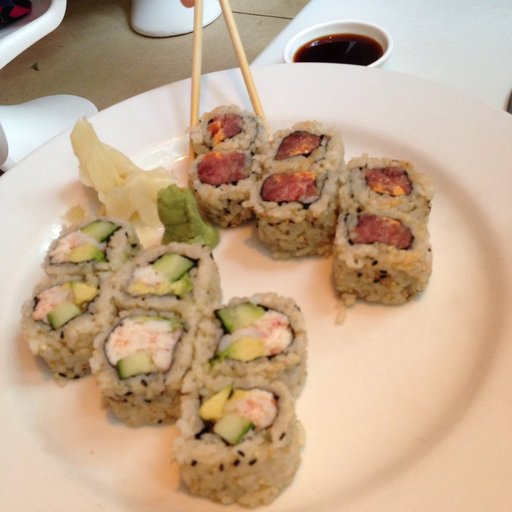

In [7]:
import random
from PIL import Image

# Seed ayarla
random.seed(42) # <- bunu değiştirip ne olduğunu görmek için deneyin

# 1. Tüm görüntü yollarını al (* her kombinasyonu ifade eder)
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Rastgele bir görüntü yolu al
random_image_path = random.choice(image_path_list)

# 3. Görüntü sınıfını yol ismi üzerinden al (görüntü sınıfı, görüntünün bulunduğu dizinin adıdır)
image_class = random_image_path.parent.stem

# 4. Görüntüyü aç
img = Image.open(random_image_path)

# 5. Meta verileri yazdır
print(f"Rastgele görüntü yolu: {random_image_path}")
print(f"Görüntü sınıfı: {image_class}")
print(f"Görüntü yüksekliği: {img.height}")
print(f"Görüntü genişliği: {img.width}")
img


Aynı şeyi [`matplotlib.pyplot.imshow()`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imshow.html) ile de yapabiliriz, ancak önce görüntüyü bir NumPy dizisine dönüştürmemiz gerekiyor.


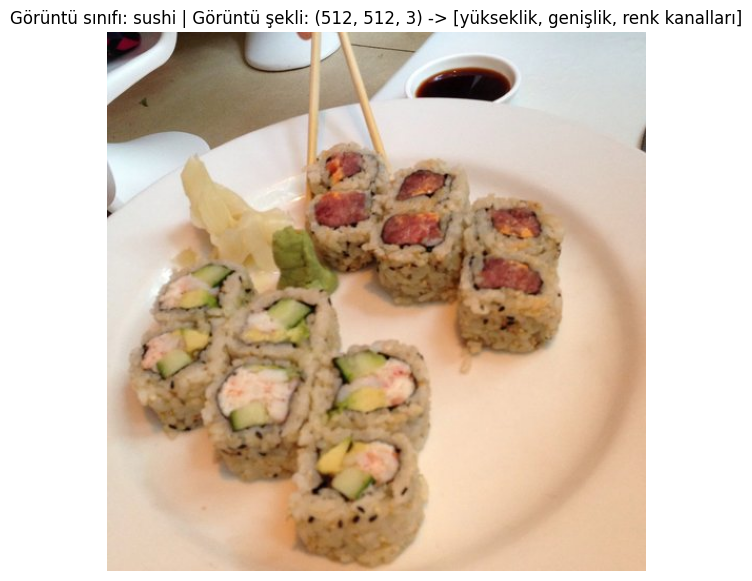

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü bir diziye dönüştür
img_as_array = np.asarray(img)

# Görüntüyü matplotlib ile çiz
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Görüntü sınıfı: {image_class} | Görüntü şekli: {img_as_array.shape} -> [yükseklik, genişlik, renk kanalları]")
plt.axis(False);


## 3. Veriyi Dönüştürme(Transforming Data)

Peki ya görüntü verimizi PyTorch'a yüklemek isteseydik?

Görüntü verimizi PyTorch ile kullanmadan önce şunları yapmamız gerekiyor:

1. Görüntüyü tensörlere dönüştürmek (görüntülerimizin sayısal temsilleri).
2. Görüntüyü bir `torch.utils.data.Dataset`'e ve ardından bir `torch.utils.data.DataLoader`'a dönüştürmek, kısaca bunlara `Dataset` ve `DataLoader` diyeceğiz.

Çalıştığınız probleme bağlı olarak PyTorch için birkaç farklı türde yerleşik veri setleri ve veri yükleyiciler vardır.

| **Problem Alanı** | **Yerleşik Veri Setleri ve Fonksiyonlar** |
| ----- | ----- |
| **Görsel** | [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) |
| **Ses** | [`torchaudio.datasets`](https://pytorch.org/audio/stable/datasets.html) |
| **Metin** | [`torchtext.datasets`](https://pytorch.org/text/stable/datasets.html) |
| **Öneri Sistemi** | [`torchrec.datasets`](https://pytorch.org/torchrec/torchrec.datasets.html) |

Biz görsel bir problemle çalıştığımız için, veri yükleme fonksiyonlarımız için `torchvision.datasets`'e ve verimizi hazırlamak için [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html)'e bakacağız.

Şimdi bazı temel kütüphaneleri içe alalım.


In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


### 3.1 `torchvision.transforms` ile Veriyi Dönüştürme

Görüntülerimiz klasörlerde fakat PyTorch ile kullanmadan önce bunları tensörlere dönüştürmemiz gerekiyor.

Bunu yapmanın yollarından biri, `torchvision.transforms` modülünü kullanmaktır.

`torchvision.transforms` görüntüleri formatlamak, onları tensörlere dönüştürmek ve hatta **veri artırma** (modelin öğrenmesini zorlaştırmak amacıyla veriyi değiştirme uygulaması, bunu ilerleyen bölümlerde göreceğiz) amacıyla manipüle etmek için birçok yerleşik yöntemi içerir.

`torchvision.transforms` ile deneyim kazanmak için, şu adımları takip eden bir dizi dönüşüm adımı yazalım:
1. Görüntüleri [`transforms.Resize()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Resize.html#torchvision.transforms.Resize) kullanarak yeniden boyutlandıralım (yaklaşık 512x512'den 64x64'e, [CNN Explainer website](https://poloclub.github.io/cnn-explainer/) üzerindeki görüntülerle aynı şekil).
2. Görüntülerimizi yatayda rastgele çevirelim, [`transforms.RandomHorizontalFlip()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomHorizontalFlip.html#torchvision.transforms.RandomHorizontalFlip) kullanarak (bu, veri artırma formu olarak kabul edilebilir çünkü görüntü verimizi yapay olarak değiştirecektir).
3. Görüntülerimizi bir PIL görüntüsünden PyTorch tensörüne dönüştürelim, bunu [`transforms.ToTensor()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor) ile yapabiliriz.

Tüm bu adımları [`torchvision.transforms.Compose()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose) kullanarak birleştirebiliriz.


In [10]:
# Görüntü için dönüşüm yazma
data_transform = transforms.Compose([
    # Görüntüleri 64x64 boyutlarına yeniden boyutlandır
    transforms.Resize(size=(64, 64)),
    # Görüntüleri yatayda rastgele çevir
    transforms.RandomHorizontalFlip(p=0.5), # p = dönüşüm olasılığı, 0.5 = %50 şans
    # Görüntüyü bir torch.Tensor'a dönüştür
    transforms.ToTensor() # bu aynı zamanda tüm piksel değerlerini 0 ile 255 arasında olanları 0.0 ile 1.0 arasına dönüştürür
])


Şimdi dönüşümlerin bir bileşimini oluşturduk, bunları çeşitli görüntüler üzerinde denemek için bir fonksiyon yazalım.


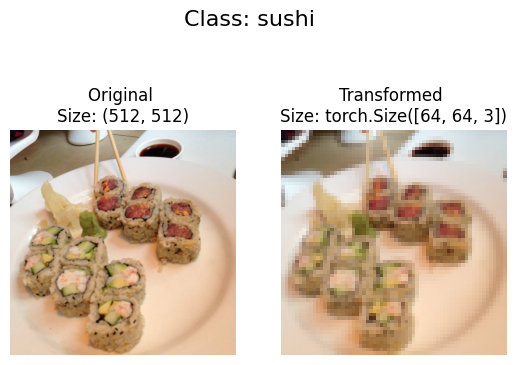

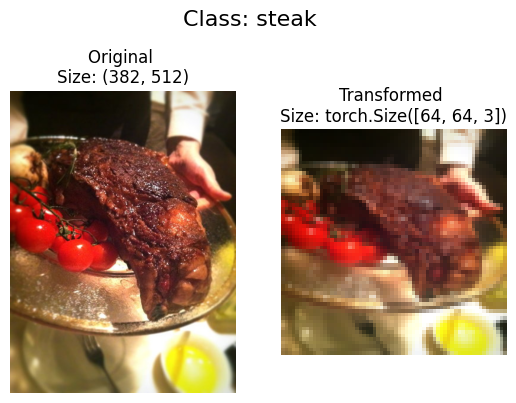

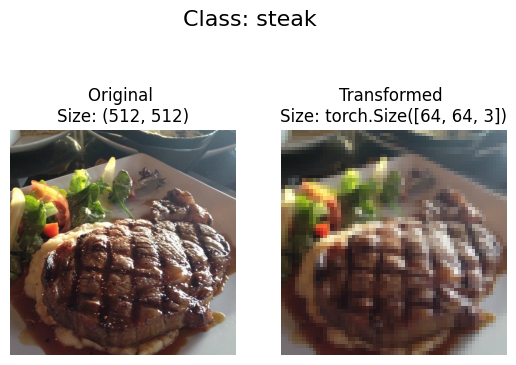

In [11]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Görüntü yollarından rastgele bir dizi görüntüyü görselleştirir.

    n adet görüntü yolu seçip, bu görüntüleri verilen transform ile dönüştürür
    ve yan yana görselleştirir.

    Args:
        image_paths (list): Hedef görüntü yollarının listesi.
        transform (PyTorch Transformları): Görüntülere uygulanacak dönüşümler.
        n (int, isteğe bağlı): Görüntü sayısı. Varsayılan 3.
        seed (int, isteğe bağlı): Rastgele sayıcı için sabit tohum. Varsayılan 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Görüntüyü dönüştür ve görselleştir
            # Not: permute() görüntü şekli değişikliğini matplotlib'e uyacak şekilde yapacak
            # (PyTorch varsayılanı [C, H, W] iken Matplotlib [H, W, C] bekler)
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)


Harika!

Artık `torchvision.transforms` kullanarak görüntülerimizi tensörlere dönüştürme yöntemimiz var.

Ayrıca gerekirse boyutlarını ve yönelimlerini de manipüle edebiliyoruz (bazı modeller, farklı boyut ve şekillerdeki görüntüleri tercih eder).

Genel olarak, görüntünün şekli büyüdükçe model daha fazla bilgi elde edebilir.

Örneğin, `[256, 256, 3]` boyutundaki bir görüntü, `[64, 64, 3]` boyutundaki bir görüntüye göre 16 kat daha fazla piksel içerir (`(256*256*3)/(64*64*3)=16`).

Ancak, bunun bir takası vardır: daha fazla piksel daha fazla hesaplama gerektirir.

> **Egzersiz:** `data_transform` içindeki dönüşümlerden birini yorum satırına alıp `plot_transformed_images()` fonksiyonunu tekrar çalıştırmayı deneyin, ne olduğunu gözlemleyin.


## 4. Seçenek 1: Görüntü Verisini [`ImageFolder`](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder) Kullanarak Yüklemek

Tamam, şimdi görüntü verimizi PyTorch ile kullanılabilecek bir `Dataset`'e dönüştürme zamanı.

Verimiz standart görüntü sınıflandırma formatında olduğu için, [`torchvision.datasets.ImageFolder`](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder) sınıfını kullanabiliriz.

Bu sınıfa, hedef görüntü dizininin dosya yolunu ve görüntülerimize uygulamak istediğimiz dönüşümleri geçirebiliriz.

Şimdi, verimizdeki `train_dir` ve `test_dir` dizinleri üzerinde bunu test edelim ve görüntülerimizi tensörlere dönüştürmek için `transform=data_transform` parametresini kullanalım.


In [12]:
# ImageFolder kullanarak veri seti oluşturma
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # hedef görüntü klasörü
                                  transform=data_transform, # verilere (görüntülere) uygulanacak dönüşümler
                                  target_transform=None) # etiketlere uygulanacak dönüşümler (gerekirse)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Eğitim verisi:\n{train_data}\nTest verisi:\n{test_data}")


Eğitim verisi:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test verisi:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


Harika!

Görünüşe göre PyTorch, `Dataset`'lerimizi başarıyla kaydetti.

Şimdi, eğitim ve test setlerimizin uzunluklarını kontrol etmenin yanı sıra `classes` ve `class_to_idx` özelliklerini inceleyerek bunları gözden geçirelim.


In [13]:
# Sınıf isimlerini bir liste olarak al
class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [14]:
# Sınıf isimlerini bir sözlük olarak da alabiliriz
class_dict = train_data.class_to_idx
class_dict


{'pizza': 0, 'steak': 1, 'sushi': 2}

In [15]:
# Uzunlukları kontrol et
len(train_data), len(test_data)


(225, 75)

Harika! Görünüşe göre bunları daha sonra referans olarak kullanabileceğiz.

Peki ya görüntülerimiz ve etiketlerimiz?

Nasıl görünüyorlar?

`train_data` ve `test_data` `Dataset`'lerine indeksleme yaparak örnekleri ve hedef etiketlerini bulabiliriz.


In [16]:
img, label = train_data[0][0], train_data[0][1]
print(f"Görüntü tensörü:\n{img}")
print(f"Görüntü şekli: {img.shape}")
print(f"Görüntü veri tipi: {img.dtype}")
print(f"Görüntü etiketi: {label}")
print(f"Etiket veri tipi: {type(label)}")


Görüntü tensörü:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0

Şimdi görüntülerimiz bir tensör formatına dönüştü (şekil `[3, 64, 64]`) ve etiketler, belirli bir sınıfa karşılık gelen bir tamsayı formatında (bu, `class_to_idx` özelliğiyle referans alındı).

Peki ya bir görüntü tensörünü `matplotlib` kullanarak görselleştirmek?

İlk olarak, uyumlu olması için bu tensörü permütasyona (boyutlarının sırasını yeniden düzenlemeye) tabi tutmamız gerekecek.

Şu anki görüntü boyutlarımız `CHW` formatında (renk kanalları, yükseklik, genişlik), ancak `matplotlib` `HWC` formatını (yükseklik, genişlik, renk kanalları) tercih eder.


Orijinal şekil: torch.Size([3, 64, 64]) -> [renk_kanalları, yükseklik, genişlik]
Görüntü permütasyonu şekli: torch.Size([64, 64, 3]) -> [yükseklik, genişlik, renk_kanalları]


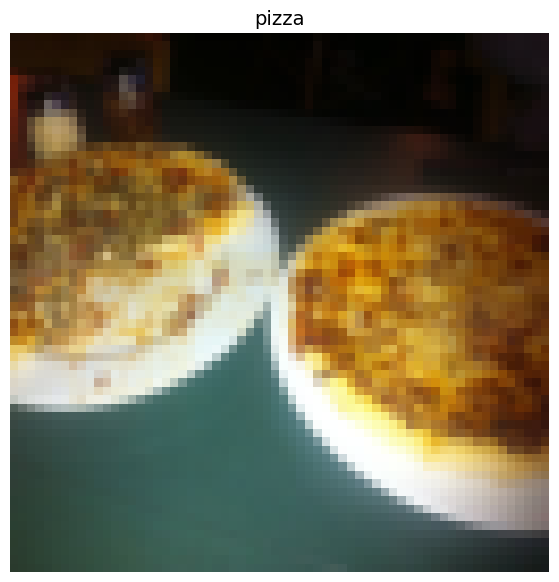

In [17]:
# Boyutların sırasını yeniden düzenle
img_permute = img.permute(1, 2, 0)

# Farklı şekilleri yazdır (permütasyondan önce ve sonra)
print(f"Orijinal şekil: {img.shape} -> [renk_kanalları, yükseklik, genişlik]")
print(f"Görüntü permütasyonu şekli: {img_permute.shape} -> [yükseklik, genişlik, renk_kanalları]")

# Görüntüyü çiz
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);


### 4.1 Yüklenen Görüntüleri `DataLoader`'lara Dönüştürme

Görüntülerimizi PyTorch `Dataset` formatında aldık, şimdi bunları `DataLoader`'lara dönüştürelim.

Bunu, [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) kullanarak yapacağız.

`Dataset`'lerimizi `DataLoader`'lara dönüştürmek, bunları yinelemeli hale getirir, böylece bir model örnekler ve hedefler (özellikler ve etiketler) arasındaki ilişkileri öğrenebilir.

Basit tutmak için, `batch_size=1` ve `num_workers=1` kullanacağız.

Peki, `num_workers` nedir?

İyi bir soru.

Bu, verinizi yüklemek için kaç alt işlem oluşturulacağını tanımlar.

Bunu şöyle düşünebilirsiniz: `num_workers` değeri ne kadar yüksek ayarlanırsa, PyTorch verinizi yüklemek için o kadar fazla işlem gücü kullanır.

Kişisel olarak, genellikle bunu Python'un [`os.cpu_count()`](https://docs.python.org/3/library/os.html#os.cpu_count) fonksiyonunu kullanarak makinemdeki toplam CPU sayısına ayarlıyorum.

Bu, `DataLoader`'ın veriyi yüklemek için mümkün olan tüm çekirdekleri kullanmasını sağlar.

> **Not:** `torch.utils.data.DataLoader` kullanarak daha fazla parametreyle tanışmak için [PyTorch dokümantasyonuna](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) göz atabilirsiniz.


In [18]:
# Eğitim ve test veri setlerini DataLoader'lara dönüştür
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # her batch için kaç örnek?
                              num_workers=1, # veri yükleme için kaç alt işlem kullanılsın? (yüksek = daha fazla)
                              shuffle=True) # veriyi karıştır?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # test verisini genellikle karıştırmaya gerek yok

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7a332124e610>,
 <torch.utils.data.dataloader.DataLoader at 0x7a33213bf950>)

Harika!

Şimdi verimiz yinelemeli hale geldi.

Bunu deneyelim ve şekilleri kontrol edelim.


In [19]:
img, label = next(iter(train_dataloader))

# Batch boyutu şimdi 1 olacak, yukarıdaki batch_size parametresini değiştirip ne olduğunu gözlemleyin
print(f"Görüntü şekli: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Etiket şekli: {label.shape}")


Görüntü şekli: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Etiket şekli: torch.Size([1])


Artık bu `DataLoader`'ları, bir modeli eğitmek ve test etmek için kullanabiliriz.

Ancak, bunu yapmadan önce, görüntüleri (ya da neredeyse her tür veriyi) yüklemek için başka bir seçeneğe bakalım.


## 5. Seçenek 2: Görüntü Verisini Özelleştirilmiş `Dataset` ile Yüklemek

Ya önceden oluşturulmuş bir `Dataset` oluşturucu, örneğin [`torchvision.datasets.ImageFolder()`](https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder), mevcut olmasaydı?

Veya özel probleminiz için bir tane yoksa?

O zaman kendi `Dataset`'inizi oluşturabilirsiniz.

Ama durun, kendi özelleştirilmiş veri yükleyici `Dataset`'inizi oluşturmanın artıları ve eksileri nedir?

| Özelleştirilmiş `Dataset` oluşturmanın artıları | Özelleştirilmiş `Dataset` oluşturmanın eksileri |
| ----- | ----- |
| Hemen hemen her şeyden bir `Dataset` oluşturabilirsiniz. | Hemen hemen her şeyden bir `Dataset` oluşturabiliyor olsanız da, bu her zaman işe yarayacağı anlamına gelmez. |
| PyTorch'un önceden oluşturulmuş `Dataset` fonksiyonlarıyla sınırlı değilsiniz. | Özelleştirilmiş bir `Dataset` kullanmak, genellikle daha fazla kod yazmayı gerektirir, bu da hatalara veya performans sorunlarına yol açabilir. |

Bunu pratikte görmek için, `torchvision.datasets.ImageFolder()`'ı taklit etmeye yönelik adımlar atacağız, bunun için `torch.utils.data.Dataset` sınıfını alt sınıflandıracağız (PyTorch'taki tüm `Dataset`'lerin temel sınıfıdır).

Başlamak için ihtiyacımız olan modülleri içe aktaralım:
* Dizelerle başa çıkmak için Python'un `os` modülü (verilerimiz dizinlerde saklanıyor).
* Dosya yollarıyla başa çıkmak için Python'un `pathlib` modülü (her bir görüntümüzün benzersiz bir dosya yolu var).
* Her şey için `torch` modülü.
* Görüntüleri yüklemek için PIL'in `Image` sınıfı.
* Özelleştirilmiş `Dataset` oluşturmak için `torch.utils.data.Dataset`.
* Görüntülerimizi tensörlere dönüştürmek için `torchvision.transforms`.
* Python'un `typing` modülünden çeşitli türler, kodumuza tür ipuçları eklemek için.

> **Not:** Aşağıdaki adımları kendi veri setiniz için özelleştirebilirsiniz. Temel prensip değişmez: Verinizi istediğiniz formatta yükleyecek kodu yazın.


In [20]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


Hatırlayın, `torchvision.datasets.ImageFolder()` örneklerimiz bize `classes` ve `class_to_idx` özelliklerini kullanma imkanı vermişti.


In [21]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Sınıf İsimlerini Almak İçin Yardımcı Bir Fonksiyon Oluşturma

Verilen bir dizin yolu ile sınıf isimlerinin bir listesini ve sınıf isimleri ile indekslerini içeren bir sözlük oluşturan yardımcı bir fonksiyon yazalım.

Bunu yapmak için:
1. Hedef dizini gezmek için `os.scandir()` fonksiyonunu kullanarak sınıf isimlerini alacağız (ideally dizin, standart görüntü sınıflandırma formatında olmalı).
2. Sınıf isimleri bulunmazsa bir hata fırlatacağız (bu durumda dizin yapısında bir sorun olabilir).
3. Sınıf isimlerini her sınıf için bir tane sayısal etikete dönüştüren bir sözlüğe çevireceğiz.

Adım 1'in küçük bir örneğini görelim, ardından tam fonksiyonu yazalım.


In [22]:
# Hedef dizin için yolu ayarla
target_directory = train_dir
print(f"Hedef dizin: {target_directory}")

# Hedef dizinden sınıf isimlerini al
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Bulunan sınıf isimleri: {class_names_found}")


Hedef dizin: data/pizza_steak_sushi/train
Bulunan sınıf isimleri: ['pizza', 'steak', 'sushi']


Harika!

Şimdi bunu tam bir fonksiyona dönüştürelim.


In [23]:
# Hedef dizindeki sınıfları bulmak için fonksiyon oluşturma
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Hedef dizindeki sınıf klasör isimlerini bulur.

    Hedef dizinin standart görüntü sınıflandırma formatında olduğunu varsayar.

    Args:
        directory (str): Sınıf isimlerini yüklemek için hedef dizin.

    Returns:
        Tuple[List[str], Dict[str, int]]: (class_name_list, dict(class_name: idx...))

    Örnek:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Hedef dizini tarayarak sınıf isimlerini al
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Sınıf isimleri bulunmazsa bir hata fırlat
    if not classes:
        raise FileNotFoundError(f"{directory} dizininde sınıflar bulunamadı.")

    # 3. Sayısal etiketlerle bir sözlük oluştur (bilgisayarlar genellikle string etiketlerden ziyade sayısal etiketleri tercih eder)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx


Harika görünüyor!

Şimdi `find_classes()` fonksiyonumuzu test edelim.


In [24]:
find_classes(train_dir)


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Özelleştirilmiş Bir `Dataset` Oluşturmak `ImageFolder`'ı Taklit Etmek İçin

Şimdi kendi özelleştirilmiş `Dataset`'imizi oluşturmak için hazırsınız.

Bunu, `torchvision.datasets.ImageFolder()` fonksiyonunun işlevselliğini taklit etmek için yapacağız.

Bu, iyi bir pratik olacaktır ve ayrıca kendi özelleştirilmiş `Dataset`'inizi oluşturmanın bazı gerekli adımlarını da ortaya çıkaracaktır.

Biraz kodlama gerekecek... ama bunun üstesinden gelebiliriz!

Adımları parçalara ayıralım:
1. `torch.utils.data.Dataset`'i alt sınıflandırın.
2. Alt sınıfımızı, bir `targ_dir` parametresi (hedef veri dizini) ve bir `transform` parametresi (verimizi dönüştürme seçeneğimiz olsun diye) ile başlatın.
3. `paths` (hedef görüntülerimizin yolları), `transform` (kullanmak isteyebileceğimiz dönüşümler, bu `None` olabilir), `classes` ve `class_to_idx` (yukarıdaki `find_classes()` fonksiyonumuzdan) için birkaç özellik oluşturun.
4. Görüntüleri dosyadan yüklemek ve bunları geri döndürmek için bir fonksiyon oluşturun, bu işlem `PIL` veya [`torchvision.io`](https://pytorch.org/vision/stable/io.html#image) kullanılarak yapılabilir (görsel verilerin girdi/çıktısı).
5. `torch.utils.data.Dataset`'in `__len__` metodunu, `Dataset`'teki örneklerin sayısını döndürecek şekilde yazın, bu önerilen bir yöntemdir ancak zorunlu değildir. Bu sayede `len(Dataset)` komutunu çalıştırabilirsiniz.
6. `torch.utils.data.Dataset`'in `__getitem__` metodunu, `Dataset`'ten tek bir örnek döndürecek şekilde yazın, bu zorunludur.

Hadi başlayalım!


In [25]:
# Özelleştirilmiş bir dataset sınıfı yazma (torch.utils.data.Dataset'ten türemiş)
from torch.utils.data import Dataset

# 1. torch.utils.data.Dataset'ten alt sınıf oluşturma
class ImageFolderCustom(Dataset):

    # 2. targ_dir ve transform (isteğe bağlı) parametresi ile başlatma
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Sınıf özelliklerini oluştur
        # Tüm görüntü yollarını al
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # not: eğer .png veya .jpeg varsa, bunu güncellemeniz gerekebilir
        # Dönüşümleri ayarla
        self.transform = transform
        # classes ve class_to_idx özelliklerini oluştur
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Görüntüleri yüklemek için bir fonksiyon oluştur
    def load_image(self, index: int) -> Image.Image:
        "Bir yolu kullanarak bir görüntü açar ve döndürür."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. __len__() metodunu ez (alt sınıflar için isteğe bağlı ancak önerilir)
    def __len__(self) -> int:
        "Toplam örnek sayısını döndürür."
        return len(self.paths)

    # 6. __getitem__() metodunu ez (alt sınıflar için zorunludur)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Verinin tek bir örneğini, veriyi ve etiketi (X, y) döndürür."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # data_folder/class_name/image.jpeg yolunu bekler
        class_idx = self.class_to_idx[class_name]

        # Gerekirse dönüşüm uygula
        if self.transform:
            return self.transform(img), class_idx # veri ve etiket (X, y) döndür
        else:
            return img, class_idx # veri ve etiket (X, y) döndür


Woah! Görüntülerimizi yüklemek için oldukça fazla kod yazdık.

Bu, kendi özelleştirilmiş `Dataset`'lerinizi oluşturmanın dezavantajlarından biridir.

Ancak, şimdi bunu bir kez yazdık, bunu bir `.py` dosyasına (örneğin `data_loader.py`) yerleştirip, bazı başka yardımcı veri işlevleriyle birlikte ileride tekrar kullanabiliriz.

Yeni `ImageFolderCustom` sınıfımızı test etmeden önce, görüntülerimizi hazırlamak için bazı dönüşümler oluşturalım.


In [26]:
# Eğitim verisini artırma
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Test verisini artırma, yalnızca yeniden şekillendirme
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


Şimdi gerçek an geldi!

Eğitim görüntülerimizi (`train_dir` içinde bulunan) ve test görüntülerimizi (`test_dir` içinde bulunan) kendi `ImageFolderCustom` sınıfımızı kullanarak `Dataset`'lere dönüştürelim.


In [27]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom


(<__main__.ImageFolderCustom at 0x7a332129a9d0>,
 <__main__.ImageFolderCustom at 0x7a33212998d0>)

Hmm... hata yok, peki çalıştı mı?

Yeni `Dataset`'lerimiz üzerinde `len()` çağrısı yapmayı deneyelim ve `classes` ile `class_to_idx` özelliklerini kontrol edelim.


In [28]:
len(train_data_custom), len(test_data_custom)


(225, 75)

In [29]:
train_data_custom.classes


['pizza', 'steak', 'sushi']

In [30]:
train_data_custom.class_to_idx


{'pizza': 0, 'steak': 1, 'sushi': 2}

`len(test_data_custom) == len(test_data)` ve `len(train_data_custom) == len(train_data)` Evet!!!

Görünüşe göre çalıştı.

Bununla birlikte, `torchvision.datasets.ImageFolder()` sınıfı tarafından oluşturulan `Dataset`'ler ile eşitlik kontrolü de yapabiliriz.


In [31]:
# Özelleştirilmiş Dataset ve ImageFolder Dataset arasında eşitlik kontrolü yapma
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)


True
True
True


Ho ho!

Bize bakın!

Üç tane `True`!

Bundan daha iyi olamaz.

Şimdi biraz daha ileriye gidelim ve bazı rastgele görüntüler çizerek `__getitem__` metodumuzu test edelim.


### 5.3 Rastgele Görüntüleri Görselleştirmek İçin Bir Fonksiyon Oluşturma

Hangi zaman geldiğini biliyorsunuz!

Şimdi veri keşifçisi şapkamızı takma zamanı ve *görselleştir, görselleştir, görselleştir!*

Bize `Dataset`'lerimizdeki görüntüleri görselleştirmede yardımcı olacak bir yardımcı fonksiyon olan `display_random_images()`'i oluşturalım.

Özellikle, bu fonksiyon:
1. Bir `Dataset` ve diğer parametreler alacak, örneğin `classes` (hedef sınıflarımızın isimleri), görüntüleri görüntüleme sayısı (`n`) ve bir rastgele tohum.
2. Görselleştirmelerin aşırıya kaçmaması için, `n`'yi 10 görüntüyle sınırlayacağız.
3. Tekrarlanabilir grafikler için rastgele tohum (eğer `seed` belirlenmişse) ayarlayacağız.
4. Görüntüleri çizmek için rastgele örnek indekslerinin bir listesini alacağız (bunun için Python'un `random.sample()` fonksiyonunu kullanabiliriz).
5. Bir `matplotlib` grafiği oluşturacağız.
6. Adım 4'te bulunan rastgele örnek indekslerinde döngü yaparak bunları `matplotlib` ile çizeceğiz.
7. Örnek görüntülerin `HWC` (yükseklik, genişlik, renk kanalları) şekline sahip olduğundan emin olacağız, böylece bunları çizebiliriz.


In [32]:
# 1. Bir Dataset ve sınıf isimleri listesi alacak fonksiyon
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Görselleştirme için n çok büyükse ayarla
    if n > 10:
        n = 10
        display_shape = False
        print(f"Görselleştirme amaçları için n 10'dan büyük olmamalıdır, n'yi 10 olarak ayarladım ve şekil görselleştirmesini kaldırdım.")

    # 3. Rastgele tohum ayarla
    if seed:
        random.seed(seed)

    # 4. Rastgele örnek indeksleri al
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Grafik ayarla
    plt.figure(figsize=(16, 8))

    # 6. Örnekler üzerinde döngü yap ve rastgele örnekleri göster
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Görüntü tensör şekliyi görselleştirme için ayarla: [color_channels, height, width] -> [height, width, color_channels]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Ayarlanmış örnekleri çiz
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)


Ne kadar güzel bir fonksiyon!

Şimdi önce `torchvision.datasets.ImageFolder()` ile oluşturduğumuz `Dataset` ile test edelim.


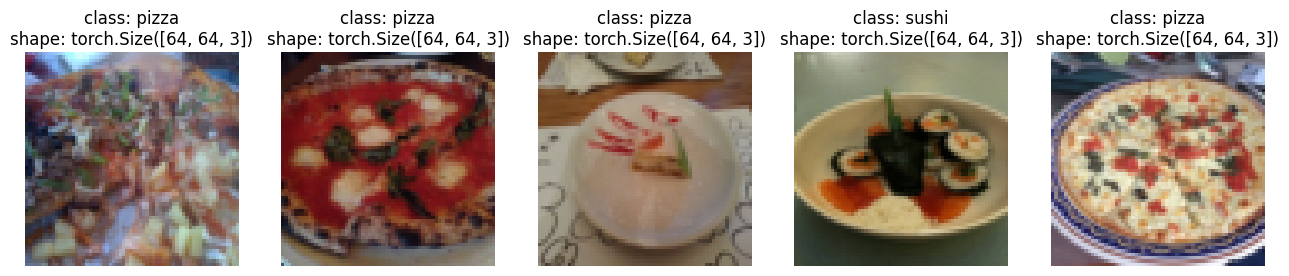

In [33]:
# ImageFolder ile oluşturduğumuz Dataset'ten rastgele görüntüler göster
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)


Ve şimdi kendi `ImageFolderCustom` sınıfımızla oluşturduğumuz `Dataset` ile test edelim.


Görselleştirme amaçları için n 10'dan büyük olmamalıdır, n'yi 10 olarak ayarladım ve şekil görselleştirmesini kaldırdım.


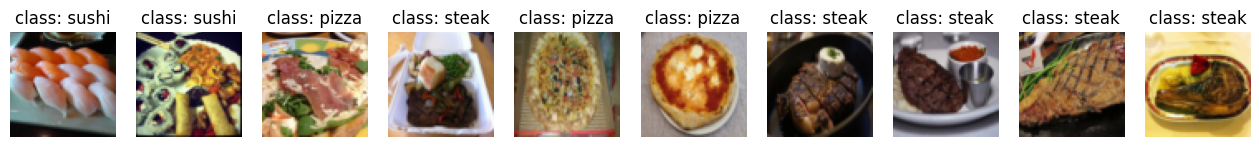

In [34]:
# ImageFolderCustom Dataset'ten rastgele görüntüler göster
display_random_images(train_data_custom,
                      n=12,
                      classes=class_names,
                      seed=None) # Tekrar üretilebilir görüntüler için tohumu ayarlamayı deneyin


Harika!!!

Görünüşe göre `ImageFolderCustom` sınıfımız tam istediğimiz gibi çalışıyor.


### 5.4 Özelleştirilmiş Yüklenen Görüntüleri `DataLoader`'lara Dönüştürme

Ham görüntülerimizi `ImageFolderCustom` sınıfımız aracılığıyla `Dataset`'lere (etiketlere veya `y`'lere eşlenen özellikler veya `X`'ler) dönüştürme yöntemine sahibiz.

Peki, özelleştirilmiş `Dataset`'lerimizi `DataLoader`'lara nasıl dönüştürebiliriz?

Eğer cevabınız `torch.utils.data.DataLoader()` kullanarak, doğru bildiniz!

Çünkü bizim özelleştirilmiş `Dataset`'imiz `torch.utils.data.Dataset` sınıfından türediği için, bunları doğrudan `torch.utils.data.DataLoader()` ile kullanabiliriz.

Ve bunu, daha önce yaptığımız adımlara çok benzer adımlar kullanarak yapabiliriz, tek fark bu sefer özelleştirilmiş `Dataset`'lerimizi kullanacağız.


In [35]:
# Özelleştirilmiş train ve test Dataset'lerini DataLoader'lara dönüştürme
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # özelleştirilmiş oluşturulmuş train Dataset'ini kullan
                                     batch_size=1, # her batch'te kaç örnek olacak?
                                     num_workers=0, # veri yüklemek için kaç alt işlem kullanılacak? (daha yüksek = daha fazla)
                                     shuffle=True) # verileri karıştır

test_dataloader_custom = DataLoader(dataset=test_data_custom, # özelleştirilmiş oluşturulmuş test Dataset'ini kullan
                                    batch_size=1,
                                    num_workers=0,
                                    shuffle=False) # test verilerini karıştırmaya genellikle gerek yok

train_dataloader_custom, test_dataloader_custom


(<torch.utils.data.dataloader.DataLoader at 0x7a3320e33c10>,
 <torch.utils.data.dataloader.DataLoader at 0x7a3320de1090>)


Numunelerin şekilleri aynı mı görünüyor?

In [36]:
# Özelleştirilmiş DataLoader'dan görüntü ve etiketi al
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch boyutu artık 1, yukarıdaki batch_size parametresini değiştirerek ne olduğunu görün
print(f"Görüntü şekli: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Etiket şekli: {label_custom.shape}")


Görüntü şekli: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Etiket şekli: torch.Size([1])


## 6. Diğer Dönüşüm Türleri (Veri Artırma)

Görüntülerimiz üzerinde bazı dönüşümleri zaten gördük ama daha pek çok dönüşüm var.

Tüm dönüşümleri [torchvision.transforms belgesinde](https://pytorch.org/vision/stable/transforms.html) bulabilirsiniz.

Dönüşümlerin amacı, görüntülerinizi bir şekilde değiştirmektir.

Bu, görüntülerinizi tensöre dönüştürmek olabilir (daha önce gördüğümüz gibi).

Ya da kırpma, rastgele bir kısmı silme veya rastgele döndürme gibi işlemler yapmak.

Bu tür dönüşümleri yapmak genellikle **veri artırma** olarak adlandırılır.

**Veri artırma**, verilerinizi öyle bir şekilde değiştirme sürecidir ki, eğitim setinizin *yapay* olarak çeşitliliğini arttırır.

Bu *yapay* olarak değiştirilen dataset üzerinde model eğitmek, umarız daha iyi bir modelin *genelleme* yapabilmesine (öğrendikleri desenlerin gelecekteki görünmeyen örneklere karşı daha dayanıklı olmasına) yardımcı olur.

PyTorch'ta `torchvision.transforms` kullanarak görüntüler üzerinde yapılan veri artırma örneklerinin pek çok farklı örneğini [Transformations Illustration örneğinde](https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html) görebilirsiniz.

Ancak, biz de birini kendimiz deneyelim.

Makine öğrenimi tamamen rastgeleliğin gücünü kullanmakla ilgilidir ve araştırmalar gösteriyor ki rastgele dönüşümler (örneğin [`transforms.RandAugment()`](https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#randaugment) ve [`transforms.TrivialAugmentWide()`](https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#trivialaugmentwide)) genellikle el ile seçilmiş dönüşümlerden daha iyi performans gösterir.

[TrivialAugment](https://arxiv.org/abs/2103.10158) arkasındaki fikir... aslında oldukça basittir.

Bir dizi dönüşümünüz vardır ve bunlardan rastgele birini seçersiniz ve seçilen dönüşümü belirli bir aralıkta rastgele bir büyüklükle uygularsınız (daha yüksek bir büyüklük, daha yoğun bir dönüşüm anlamına gelir).

PyTorch ekibi bile [TrivialAugment'ı en son devlet-of-the-art görsel modellerini eğitmek için kullandı](https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#break-down-of-key-accuracy-improvements).

![trivial augment veri artırma, PyTorch devlet-of-the-art eğitiminde kullanılmakta](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-trivial-augment-being-using-in-PyTorch-resize.png)

*TrivialAugment, yakın zamanda çeşitli PyTorch görsel modellerini eğitmek için yapılan devlet-of-the-art eğitim iyileştirmelerine dahil edilen bir bileşen olmuştur.*

Kendi görüntülerimiz üzerinde bunu test etmeye ne dersiniz?

`transforms.TrivialAugmentWide()` içindeki dikkat edilmesi gereken ana parametre `num_magnitude_bins=31`'dir.

Bu, belirli bir dönüşümü uygulamak için seçilecek yoğunluk değerinin aralığını tanımlar, `0` hiç bir aralık yok demekken, `31` maksimum aralık demektir (en yüksek yoğunluk için en yüksek şans).

Şimdi `transforms.TrivialAugmentWide()`'ı `transforms.Compose()` içine entegre edebiliriz.


In [37]:
from torchvision import transforms

# Eğitim verileri için dönüşümler
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # dönüşüm ne kadar yoğun olacak
    transforms.ToTensor() # her şeyi 0 ile 1 arasında almak için en son ToTensor() kullan
])

# Test verileri için dönüşüm, veri artırma yapılmaz
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


> **Not:** Genellikle test seti üzerinde veri artırma yapılmaz. Veri artırmanın amacı, eğitim setinin çeşitliliğini *yapay* olarak arttırarak test seti üzerinde daha iyi tahminler yapmaktır.
>
> Ancak, test seti görüntülerinin tensörlere dönüştürülmesi gerektiğini unutmamalısınız. Test görüntülerini eğitim görüntülerimizle aynı boyutta ölçeklendiriyoruz, ancak gerektiğinde farklı boyuttaki görüntülerle çıkarım yapılabilir (ancak bu, performansı değiştirebilir).

Harika, şimdi bir eğitim dönüşümümüz (veri artırma ile) ve bir test dönüşümümüz (veri artırmasız) var.

Hadi veri artırmamızı test edelim!


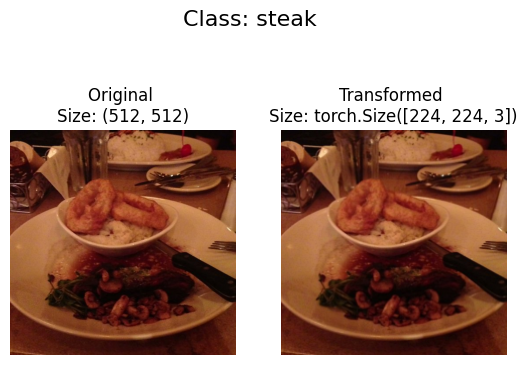

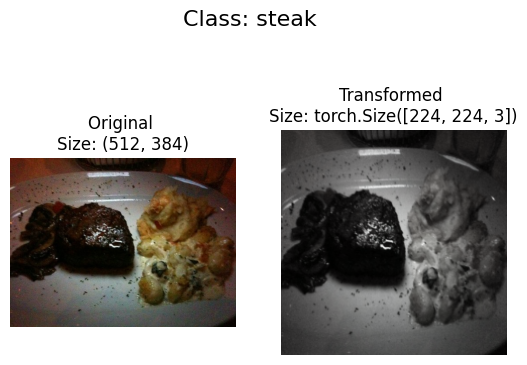

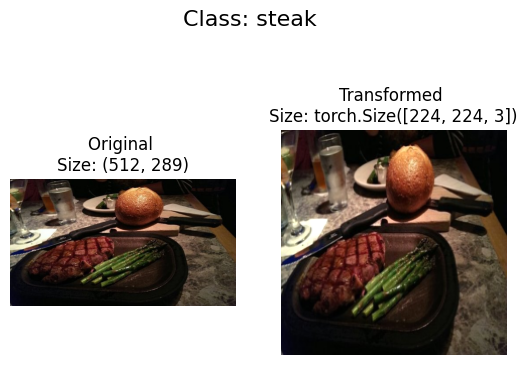

In [38]:
# Tüm görüntü yollarını al
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Rastgele görüntüleri çiz
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)


Hücreyi birkaç kez yukarıda çalıştırmayı ve orijinal görüntünün dönüşümden geçerken nasıl değiştiğini görmeyi deneyin.

## 7. Model 0: Veri Artırma Olmadan TinyVGG

Tamam, verilerimizi klasörlerden dönüştürülmüş tensörlere nasıl çevireceğimizi gördük.

Şimdi, bir bilgisayarla görme modeli kurarak bir görüntünün pizza, biftek veya sushi olup olmadığını sınıflandırıp sınıflandıramayacağımızı görelim.

Başlamak için, yalnızca görüntüleri (64, 64) boyutlarına yeniden boyutlandırarak ve bunları tensörlere dönüştürerek basit bir dönüşüm ile başlayacağız.


### 7.1 Model 0 İçin Dönüşümler Oluşturma ve Veriyi Yükleme

In [39]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

Harika, şimdi basit bir dönüşümümüz var, şimdi:
1. Verileri yükleyelim, önce her bir eğitim ve test klasörümüzü torchvision.datasets.ImageFolder() kullanarak bir Dataset'e dönüştürelim.
2. Ardından torch.utils.data.DataLoader() kullanarak bunları bir DataLoader'a dönüştürelim.
    * batch_size=32 olarak ayarlayacağız ve num_workers'ü makinemizdeki CPU sayısına (kullandığınız makineye bağlı olarak) ayarlayacağız.


In [40]:
# 1. Veriyi yükle ve dönüşümleri uygula
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Veriyi DataLoader'lara dönüştür
import os
from torch.utils.data import DataLoader

# Batch boyutu ve işçi sayısını ayarla
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"DataLoader'lar batch boyutu {BATCH_SIZE} ve {NUM_WORKERS} işçi ile oluşturuluyor.")

# DataLoader'ları oluştur
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple



DataLoader'lar batch boyutu 32 ve 2 işçi ile oluşturuluyor.


(<torch.utils.data.dataloader.DataLoader at 0x7a3320ff62d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a3320bc5450>)

### 7.2 TinyVGG Model Sınıfını Oluşturma

[notebook 03](https://www.learnpytorch.io/03_pytorch_computer_vision/#7-model-2-building-a-convolutional-neural-network-cnn)'te, [CNN Explainer](https://poloclub.github.io/cnn-explainer/) web sitesinden TinyVGG modelini kullandık.

Şimdi aynı modeli tekrar yaratacağız, ancak bu sefer gri tonlama yerine renkli görüntüler kullanacağız (`in_channels=3` yerine `in_channels=1` RGB pikselleri için).


In [46]:
class TinyVGG(nn.Module):
    """
    Model mimarisi, TinyVGG'yi şu kaynaktan alır:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # Görüntü üzerinde hareket eden karesel boyut nedir?
                      stride=1, # varsayılan
                      padding=1), # seçenekler = "valid" (padding yok), "same" (çıkışın girdiyle aynı şekle sahip olmasını sağlar) veya belirli bir sayı için int
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # varsayılan stride değeri kernel_size ile aynıdır
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Bu in_features şekli nereden geldi?
            # Çünkü ağımızın her katmanı, giriş verilerimizin şekli üzerinde sıkıştırma ve değişiklik yapar.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- işlem füzyonunun avantajlarından yararlanmak için

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # renk kanalı sayısı (RGB için 3)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

> **Not:** Derin öğrenme modellerinin GPU üzerinde hesaplamalarını hızlandırmanın yollarından biri **işlem füzyonunu** kullanmaktır.
>
> Bu, modelimizdeki `forward()` metodunda, her seferinde bir katman bloğunu çağırmak ve `x`'i yeniden atamak yerine, her bloğu ardışık olarak çağırmamız anlamına gelir (modeldeki `forward()` metodunun son satırında bir örnek görmek mümkündür).
>
> Bu, `x`'i yeniden atamak için harcanan zamanı (bellek açısından ağır) kurtarır ve sadece `x` üzerinde hesaplama yapmaya odaklanır.
>
> Daha fazla bilgi için Horace He'nin [*Making Deep Learning Go Brrrr From First Principles*](https://horace.io/brrr_intro.html) yazısına göz atabilirsiniz.

Şimdi bu model güzel görünüyor!

Bir tek görüntü üzerinde ileri geçiş ile test etmeye ne dersiniz?


### 7.3 Tek bir görüntü üzerinde ileri geçiş yapmayı deneyin (modeli test etmek için)

Bir modeli test etmenin iyi bir yolu, tek bir veri parçası üzerinde ileri geçiş yapmaktır.

Bu, farklı katmanlarımızın giriş ve çıkış şekillerini test etmek için de kullanışlı bir yoldur.

Tek bir görüntü üzerinde ileri geçiş yapmak için şunları yapalım:
1. `DataLoader`'dan bir batch (küme) görüntü ve etiket alın.
2. Batch'ten bir tek görüntü alın ve görüntüyü `unsqueeze()` fonksiyonu ile genişletin, böylece batch boyutu `1` olur (böylece şekli modele uyar).
3. Tek bir görüntü üzerinde çıkarım yapın (görüntüyü hedef `device`'e gönderdiğinizden emin olun).
4. Neler olup bittiğini yazdırın ve modelin ham çıkış logitlerini tahmin olasılıklarına dönüştürmek için `torch.softmax()` fonksiyonunu kullanın (çünkü çok sınıflı veri ile çalışıyoruz) ve tahmin olasılıklarını tahmin etiketlerine dönüştürmek için `torch.argmax()` fonksiyonunu kullanın.


In [47]:
# 1. `DataLoader`'dan bir batch görüntü ve etiket alın
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Batch'ten bir tek görüntü alın ve görüntüyü `unsqueeze()` ile genişletin, böylece şekli modele uyar
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Tek bir görüntü şekli: {img_single.shape}\n")

# 3. Tek bir görüntü üzerinde ileri geçiş yapın
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Neler olup bittiğini yazdırın ve modelin logitlerini -> tahmin olasılıklarını -> tahmin etiketini dönüştürün
print(f"Çıktı logit'leri:\n{pred}\n")
print(f"Çıktı tahmin olasılıkları:\n{torch.softmax(pred, dim=1)}\n")
print(f"Çıktı tahmin etiketi:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Gerçek etiket:\n{label_single}")


Tek bir görüntü şekli: torch.Size([1, 3, 64, 64])

Çıktı logit'leri:
tensor([[0.0578, 0.0634, 0.0351]])

Çıktı tahmin olasılıkları:
tensor([[0.3352, 0.3371, 0.3277]])

Çıktı tahmin etiketi:
tensor([1])

Gerçek etiket:
2


Harika, modelimizin beklediğimiz şekilde çıktı verdiği görünüyor.

Yukarıdaki hücreyi birkaç kez çalıştırabilirsiniz ve her seferinde farklı bir görüntü üzerinde tahminde bulunulacaktır.

Ve muhtemelen tahminlerin çoğunlukla yanlış olduğunu fark edeceksiniz.

Bu beklenen bir durumdur çünkü model henüz eğitilmedi ve aslında rastgele ağırlıklar kullanarak tahminde bulunuyor.


### 7.4 Modelimize giren şekiller hakkında bir fikir edinmek için `torchinfo` kullanın

Modelimizi `print(model)` ile yazdırmak, modelimizde neler olup bittiği hakkında bir fikir verir.

Ayrıca, verilerimizin `forward()` metodu boyunca şekillerini yazdırabiliriz.

Ancak, modelimizden bilgi almanın faydalı bir yolu, [`torchinfo`](https://github.com/TylerYep/torchinfo) kullanmaktır.

`torchinfo`, bir PyTorch modelini ve bir `input_shape` alarak, verinin modelde nasıl hareket ettiğini gösteren bir `summary()` metoduyla birlikte gelir.

> **Not:** Eğer Google Colab kullanıyorsanız, `torchinfo`'yu yüklemeniz gerekecek.


In [48]:
# Eğer `torchinfo` yüklü değilse yükleyin, eğer yüklüyse içeri aktarın
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # Örnek bir giriş boyutuyla test geçişi yapın


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

Harika!

`torchinfo.summary()` çıktısı, modelimiz hakkında çok fazla bilgi verir.

Örneğin, modelimizdeki toplam parametre sayısı olan `Total params`, modelimizin boyutu olan `Estimated Total Size (MB)` gibi bilgileri görürüz.

Ayrıca, belirli bir `input_size` verisi modelimizde hareket ettikçe giriş ve çıkış şekillerindeki değişiklikleri de görebilirsiniz.

Şu an için, parametre sayılarımız ve toplam model boyutumuz düşük.

Bu, küçük bir modelle başladığımız içindir.

Ve eğer ileride modelin boyutunu artırmamız gerekirse, bunu yapabiliriz.


### 7.5 Eğitim ve test döngüsü fonksiyonlarını oluşturma

Verilerimiz ve modelimiz hazır.

Şimdi, modelimizi eğitim verileri üzerinde eğitmek ve test verileri üzerinde modelimizi değerlendirmek için bazı eğitim ve test döngüsü fonksiyonları oluşturalım.

Ve bu eğitim ve test döngülerini tekrar kullanabilmek için, onları fonksiyonlaştıracağız.

Özellikle, üç fonksiyon oluşturacağız:
1. `train_step()` - bir model, bir `DataLoader`, bir kayıp fonksiyonu ve bir optimizatör alır ve modeli `DataLoader` üzerinde eğitir.
2. `test_step()` - bir model, bir `DataLoader` ve bir kayıp fonksiyonu alır ve modeli `DataLoader` üzerinde değerlendirir.
3. `train()` - 1. ve 2.'yi verilen sayıda epoch boyunca birlikte çalıştırır ve bir sonuç sözlüğü döndürür.

> **Not:** PyTorch optimizasyon döngüsündeki adımları [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/#creating-an-optimization-loop-in-pytorch) içinde ele aldık, ayrıca [Unofficial PyTorch Optimization Loop Song](https://youtu.be/Nutpusq_AFw) şarkısını ve [notebook 03](https://www.learnpytorch.io/03_pytorch_computer_vision/#62-functionizing-training-and-test-loops) içindeki benzer fonksiyonları inceledik.

Başlangıç olarak, `train_step()` fonksiyonunu oluşturalım.

Çünkü `DataLoader`'da batch'lerle çalışıyoruz, eğitim sırasında model kaybı ve doğruluk değerlerini biriktireceğiz (her batch için bunları toplayarak) ve sonra sonunda bunları düzeltip geri döndüreceğiz.


In [49]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Modeli eğitim moduna al
    model.train()

    # Eğitim kaybı ve doğruluk değerlerini ayarla
    train_loss, train_acc = 0, 0

    # DataLoader'dan veri batch'leri üzerinde döngü
    for batch, (X, y) in enumerate(dataloader):
        # Veriyi hedef cihaza gönder
        X, y = X.to(device), y.to(device)

        # 1. İleri geçiş
        y_pred = model(X)

        # 2. Kayıp hesapla ve biriktir
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizatör sıfırla
        optimizer.zero_grad()

        # 4. Kayıp geri yayılımı
        loss.backward()

        # 5. Optimizatör adımı
        optimizer.step()

        # Tüm batch'ler üzerinde doğruluk metriğini hesapla ve biriktir
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Ortalama kayıp ve doğruluk değerlerini her batch için ayarla
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc


Woohoo! `train_step()` fonksiyonu tamamlandı.

Şimdi aynı işlemi `test_step()` fonksiyonu için yapalım.

Buradaki ana fark, `test_step()` fonksiyonunun bir optimizatör almayacak olması ve bu nedenle gradyan inişi yapmıyor olmasıdır.

Ancak çıkarım yapacağımız için, tahminler yaparken `torch.inference_mode()` bağlam yöneticisini açtığımızdan emin olacağız.


In [50]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Modeli değerlendirme moduna al
    model.eval()

    # Test kaybı ve doğruluk değerlerini ayarla
    test_loss, test_acc = 0, 0

    # Çıkarım bağlam yöneticisini aç
    with torch.inference_mode():
        # DataLoader'dan batch'ler üzerinde döngü
        for batch, (X, y) in enumerate(dataloader):
            # Veriyi hedef cihaza gönder
            X, y = X.to(device), y.to(device)

            # 1. İleri geçiş
            test_pred_logits = model(X)

            # 2. Kayıp hesapla ve biriktir
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Doğruluğu hesapla ve biriktir
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Ortalama kayıp ve doğruluk değerlerini her batch için ayarla
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


### 7.6 `train()` fonksiyonu oluşturarak `train_step()` ve `test_step()`'i birleştirme

Şimdi, `train_step()` ve `test_step()` fonksiyonlarımızı birleştirecek bir yolumuz olmalı.

Bunu yapmak için, onları bir `train()` fonksiyonunda paketleyeceğiz.

Bu fonksiyon, modeli eğitmek ve değerlendirmek için kullanılacaktır.

Özellikle, şu adımları takip edecektir:
1. Bir model, eğitim ve test setleri için bir `DataLoader`, bir optimizatör, bir kayıp fonksiyonu ve her eğitim ve test adımını ne kadar süreyle gerçekleştireceğimizi alacak.
2. `train_loss`, `train_acc`, `test_loss` ve `test_acc` değerleri için boş bir sonuç sözlüğü oluşturacak (bu sözlük, eğitim devam ettikçe doldurulacaktır).
3. Belirli bir sayıda epoch için eğitim ve test adımlarını döngüye alacak.
4. Her epoch'un sonunda neler olup bittiğini yazdıracak.
5. Boş sonuç sözlüğünü her epoch'ta güncellenen metriklerle dolduracak.
6. Doldurulmuş sonuçları döndürecek.

Geçtiğimiz epoch sayısını takip etmek için, `tqdm.auto`'dan `tqdm`'yi içe aktaralım ([`tqdm`](https://github.com/tqdm/tqdm), Python için en popüler ilerleme çubuğu kütüphanelerinden biridir ve `tqdm.auto` çevresel duruma bağlı olarak en uygun ilerleme çubuğunu otomatik olarak seçer, örneğin Jupyter Notebook vs. Python betiği).


In [51]:
from tqdm.auto import tqdm

# 1. Eğitim ve test adımları için gereken çeşitli parametreleri al
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Boş bir sonuç sözlüğü oluştur
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Belirli bir sayıda epoch için eğitim ve test adımlarını döngüye al
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Neler olup bittiğini yazdır
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Sonuç sözlüğünü güncelle
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Epoch'ların sonunda doldurulmuş sonuçları döndür
    return results


### 7.7 Model 0'ı Eğitme ve Değerlendirme

Tamam, tamam, tamam! Modelimizi eğitmek ve değerlendirmek için ihtiyacımız olan tüm bileşenlere sahibiz.

Şimdi `TinyVGG` modelimizi, `DataLoader`'larımızı ve `train()` fonksiyonumuzu birleştirip, pizza, biftek ve suşi arasındaki farkı ayırt edebilen bir model oluşturup oluşturamayacağımıza bakalım!

Önce `model_0`'ı yeniden oluşturacağız (bunu yapmamıza gerek yok ama tamamlık açısından yapacağız), ardından gerekli parametreleri geçirerek `train()` fonksiyonumuzu çağıracağız.

Deneylerimizi hızlı tutmak için, modelimizi **5 epoch** boyunca eğiteceğiz (istediğiniz takdirde bunu artırabilirsiniz).

Bir **optimizatör** ve **kayıp fonksiyonu** olarak, `torch.nn.CrossEntropyLoss()` kullanacağız (çünkü çok sınıflı sınıflandırma verisi ile çalışıyoruz) ve `torch.optim.Adam()` optimizatörünü, öğrenme oranı olarak `1e-3` ile kullanacağız.

Ne kadar sürdüğünü görmek için, eğitim süresini hesaplamak amacıyla Python'un [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer) metodunu içe aktaracağız.


In [52]:
# Rastgele tohumları ayarla
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epoch sayısını ayarla
NUM_EPOCHS = 5

# TinyVGG modelinin bir örneğini yeniden oluştur
model_0 = TinyVGG(input_shape=3, # renk kanalı sayısı (RGB için 3)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Kayıp fonksiyonunu ve optimizatörü ayarla
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Zamanlayıcıyı başlat
from timeit import default_timer as timer
start_time = timer()

# model_0'ı eğit
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# Zamanlayıcıyı bitir ve ne kadar sürdüğünü yazdır
end_time = timer()
print(f"Toplam eğitim süresi: {end_time-start_time:.3f} saniye")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1343 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.1434 | test_acc: 0.1979
Toplam eğitim süresi: 10.811 saniye


Hmm...

Görünüşe göre modelimiz oldukça kötü performans gösterdi.

Ama şu an için sorun değil, pes etmeyeceğiz.

Bunu potansiyel olarak nasıl iyileştirebilirsiniz?

> **Not:** Modelimizi iyileştirmek için fikirler için [*Model Bakış Açısından Bir Modeli İyileştirme*](https://www.learnpytorch.io/02_pytorch_classification/#5-improving-a-model-from-a-model-perspective) bölümüne göz atın.


### 7.8 Model 0'ın Kayıp Eğrilerini Çizme

`model_0` eğitimimizin yazdırdığı sonuçlardan, modelimizin pek iyi performans göstermediği görünüyordu.

Ancak modelin **kayıp eğrilerini** çizerek bunu daha da değerlendirebiliriz.

**Kayıp eğrileri**, modelin zaman içindeki sonuçlarını gösterir.

Ve modelinizin farklı veri setlerinde (örneğin, eğitim ve test) nasıl performans gösterdiğini görmek için harika bir yoldur.

Hadi, `model_0_results` sözlüğümüzdeki değerleri çizmek için bir fonksiyon oluşturalım.


In [53]:
# model_0_results sözlüğünün anahtarlarını kontrol et
model_0_results.keys()


dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

Bu anahtarların her birini çıkarmamız ve bunları bir grafiğe dönüştürmemiz gerekecek.


In [54]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Bir sonuç sözlüğünün eğitim eğrilerini çizer.

    Args:
        results (dict): Değerlerin listelerini içeren sözlük, örneğin:
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Sonuç sözlüğündeki kayıp değerlerini al (eğitim ve test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Sonuç sözlüğündeki doğruluk değerlerini al (eğitim ve test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Kaç epoch olduğunu belirle
    epochs = range(len(results['train_loss']))

    # Bir grafik oluştur
    plt.figure(figsize=(15, 7))

    # Kayıp eğrisini çiz
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Kayıp')
    plt.xlabel('Epochs')
    plt.legend()

    # Doğruluk eğrisini çiz
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Doğruluk')
    plt.xlabel('Epochs')
    plt.legend();


Tamam, şimdi `plot_loss_curves()` fonksiyonumuzu test edelim.


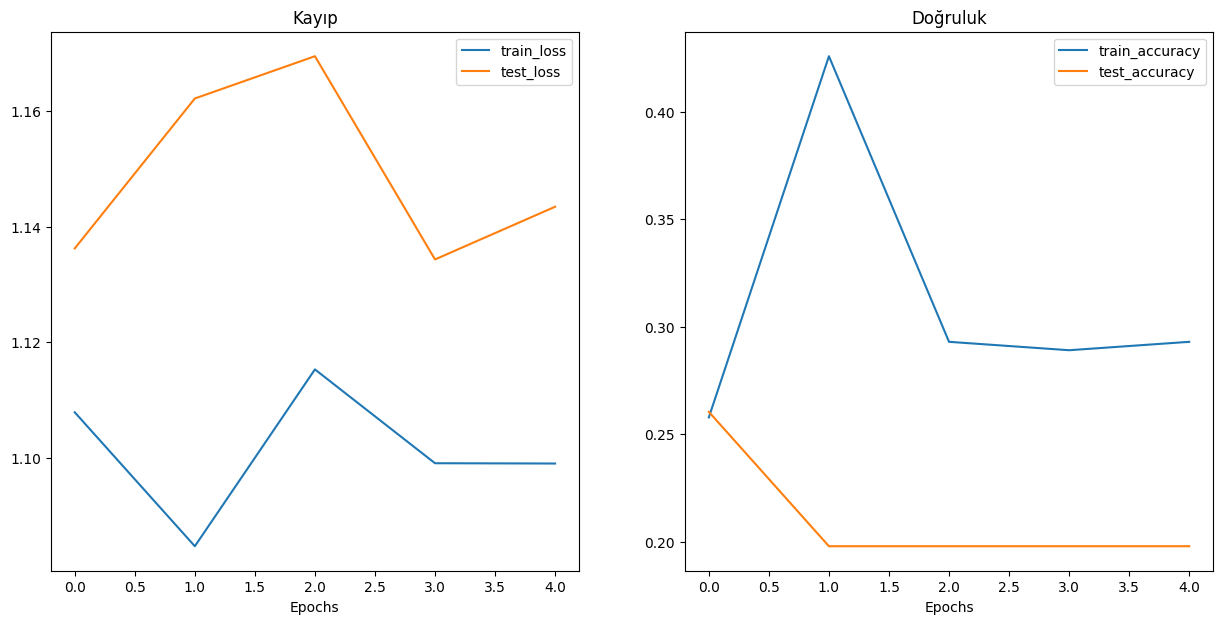

In [55]:
plot_loss_curves(model_0_results)


Vay.

Görünüşe göre her şey karışmış...

Ama bunu bekliyorduk çünkü modelimizin eğitim sırasında yazdırdığı sonuçlar pek umut verici değildi.

Modeli daha uzun süre eğitmeyi deneyebilirsiniz ve daha uzun bir zaman diliminde kayıp eğrisini çizdiğinizde ne olduğunu görebilirsiniz.


## 8. İdeal Bir Kayıp Eğrisinin Görünümü Nasıl Olmalıdır?

Eğitim ve test kayıp eğrilerine bakmak, modelinizin **aşırı uyum sağlama (overfitting)** yapıp yapmadığını görmek için harika bir yoldur.

Aşırı uyum sağlamış bir model, eğitim setinde doğrulama/test setine göre daha iyi performans gösteren (genellikle büyük bir farkla) bir modeldir.

Eğer eğitim kaybınız, test kaybınızdan çok daha düşükse, modeliniz **aşırı uyum sağlıyor** demektir.

Yani, eğitim verisindeki desenleri çok iyi öğreniyor ve bu desenler test verilerine genellenmiyor.

Diğer taraftan, eğer eğitim ve test kayıplarınız istediğiniz kadar düşük değilse, bu **yetersiz uyum (underfitting)** olarak kabul edilir.

Eğitim ve test kayıp eğrisinin ideal durumu, bu eğrilerin birbirine yakın bir şekilde hizalanmasıdır.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-loss-curves-overfitting-underfitting-ideal.jpg" alt="overfitting, underfitting ve ideal kayıp eğrilerini gösteren eğitim ve test kayıp eğrileri" width="800"/>

*Sol: Eğitim ve test kayıp eğrileriniz istediğiniz kadar düşük değilse, bu **yetersiz uyum** olarak kabul edilir. *Orta:* Test/doğrulama kaybınız eğitim kaybınızdan yüksekse, bu **aşırı uyum sağlama** olarak kabul edilir. *Sağda:* İdeal senaryo, eğitim ve test kayıp eğrilerinin zamanla hizalanmasıdır. Bu, modelinizin iyi genellenmiş olduğu anlamına gelir. Kayıp eğrilerinin daha fazla kombinasyonu ve farklı davranışları olabilir, bunlar hakkında daha fazla bilgi için Google'ın [Kayıp Eğrilerini Yorumlama Rehberi](https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic)'ne göz atabilirsiniz.*


### 8.1 Aşırı Uyumu Nasıl Önleriz?

Aşırı uyum sağlamanın temel problemi, modelinizin eğitim verisini *çok iyi* uyarlamış olmasıdır, bu yüzden modelinize "bunu kontrol altına alacak" teknikler kullanmak istersiniz.

Aşırı uyumu önlemenin yaygın bir tekniği, [**düzenlileştirme**](https://ml-cheatsheet.readthedocs.io/en/latest/regularization.html) olarak bilinir.

Bunu, modellerimizi *daha düzenli* hale getirmek olarak düşünüyorum, yani *daha fazla* veri türünü uyarlayabilen modeller yapmak.

Aşırı uyumu önlemek için birkaç yöntemi tartışalım.

| **Aşırı uyumu önleme yöntemi** | **Nedir?** |
| ----- | ----- |
| **Daha fazla veri toplayın** | Daha fazla veriye sahip olmak, modele daha fazla örüntü öğrenme fırsatı verir, bu örüntüler yeni örneklere daha genellenebilir olabilir. |
| **Modelinizi basitleştirin** | Mevcut model zaten eğitim verilerine aşırı uyum sağlıyorsa, model çok karmaşık olabilir. Bu, verilerin örüntülerini çok iyi öğrendiği ve yeni verilere genellenemediği anlamına gelir. Bir modeli basitleştirmenin bir yolu, kullanılan katman sayısını azaltmak veya her katmandaki gizli birim sayısını azaltmaktır. |
| **Veri artırma kullanın** | [**Veri artırma**](https://developers.google.com/machine-learning/glossary#data-augmentation), modelin öğrenmesini zorlaştıracak şekilde eğitim verisini manipüle eder, böylece veriye yapay olarak daha fazla çeşitlilik ekler. Model artırılmış verilerde örüntüleri öğrenebiliyorsa, model görünmeyen verilere daha iyi genellenebilir. |
| **Transfer öğrenmeyi kullanın** | [**Transfer öğrenme**](https://developers.google.com/machine-learning/glossary#transfer-learning), bir modelin öğrendiği örüntüleri (pretrained ağırlıklar olarak da bilinir) kullanarak kendi görevinizin temeli olarak kullanma işlemidir. Bizim durumumuzda, büyük bir çeşitlilikteki görüntülerde önceden eğitilmiş bir bilgisayarla görme modelini kullanabiliriz ve ardından onu gıda görüntüleri için daha özel hale getirebiliriz. |
| **Dropout katmanları kullanın** | Dropout katmanları, sinir ağlarındaki gizli katmanlar arasındaki bağlantıları rastgele kaldırır, bu da modeli basitleştirir, ancak kalan bağlantıları daha iyi hale getirir. Daha fazla bilgi için [`torch.nn.Dropout()`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)'a bakabilirsiniz. |
| **Öğrenme oranı azalma kullanın** | Buradaki fikir, model eğitildikçe öğrenme oranını yavaşça düşürmektir. Bu, bir kanepenin arkasındaki parayı almaya benzer. Ne kadar yakınlaşırsanız, adımlarınız o kadar küçük olur. Aynı şekilde, **yakınsama**'ya yaklaştıkça, ağırlık güncellemelerinizin küçük olması gerekir. |
| **Erken durdurma kullanın** | [**Erken durdurma**](https://developers.google.com/machine-learning/glossary#early_stopping), model eğitimini *aşırı uyum sağlamadan önce* durdurur. Örneğin, modelin kaybı son 10 epoch'ta (bu sayı keyfi) düşmemişse, model eğitimini burada durdurmak isteyebilirsiniz ve en düşük kayba sahip olan model ağırlıklarını (10 epoch önce) kullanabilirsiniz. |

Aşırı uyumu önlemek için daha fazla yöntem vardır, ancak bunlar bazı ana yöntemlerdir.

Daha derin modeller geliştirmeye başladıkça, derin öğrenmelerin *verilerdeki örüntüleri öğrenmede ne kadar iyi olduklarını* fark edeceksiniz ve aşırı uyum, derin öğrenmenin temel problemlerinden biri olacaktır.


### 8.2 Yetersiz Uyumu Nasıl Önleriz?

Bir model [**yetersiz uyum sağlıyorsa**](https://developers.google.com/machine-learning/glossary#underfitting), eğitim ve test setlerinde zayıf bir tahmin gücüne sahip olduğu kabul edilir.

Özünde, yetersiz uyum sağlamış bir model, kayıp değerlerini istenilen seviyeye indirmekte başarısız olur.

Şu anda, mevcut kayıp eğrilerimize bakarak, `TinyVGG` modelimiz `model_0`'ın veriye yetersiz uyum sağladığını düşünüyorum.

Yetersiz uyumu ele almanın ana fikri, modelinizin tahmin gücünü *artırmak*tır.

Bunu yapmanın birkaç yolu vardır.

| **Yetersiz uyumu önleme yöntemi** | **Nedir?** |
| ----- | ----- |
| **Modelinize daha fazla katman/birim ekleyin** | Modeliniz yetersiz uyum sağlıyorsa, verinin gerekli örüntülerini/ağırlıklarını/temsilini öğrenme kapasitesi yeterli olmayabilir. Modelinize daha fazla tahmin gücü eklemenin bir yolu, gizli katmanlar/katmanlardaki gizli birim sayısını artırmaktır. |
| **Öğrenme oranını ayarlayın** | Belki modelinizin öğrenme oranı başlangıçta çok yüksektir. Her epoch'ta ağırlıklarını çok fazla güncellemeye çalışıyordur ve bunun sonucunda hiçbir şey öğrenmiyor olabilir. Bu durumda, öğrenme oranını düşürmeyi deneyebilir ve ne olduğunu gözlemleyebilirsiniz. |
| **Transfer öğrenme kullanın** | Transfer öğrenme, aşırı uyum ve yetersiz uyum sorunlarını önleyebilir. Önceden çalışmış bir modelin örüntülerini kullanmak ve bunları kendi probleminize uyarlamak anlamına gelir. |
| **Daha uzun süre eğitim yapın** | Bazen bir modelin, verilerin temsillerini öğrenmesi için daha fazla zamana ihtiyacı vardır. Küçük deneylerinizde modelinizin hiçbir şey öğrenmediğini fark ediyorsanız, belki de daha fazla epoch eğitimi, daha iyi performans sonuçları verebilir. |
| **Daha az düzenlileştirme kullanın** | Belki modelinizin yetersiz uyum sağlamasının sebebi, aşırı uyumu engellemeye fazla çalışmanızdır. Düzenlileştirme tekniklerini biraz daha gevşetmek, modelinizin veriye daha iyi uyum sağlamasına yardımcı olabilir. |


### 8.3 The balance between overfitting and underfitting

None of the methods discussed above are silver bullets, meaning, they don't always work.

And preventing overfitting and underfitting is possibly the most active area of machine learning research.

Since everone wants their models to fit better (less underfitting) but not so good they don't generalize well and perform in the real world (less overfitting).

There's a fine line between overfitting and underfitting.

Because too much of each can cause the other.

Transfer learning is perhaps one of the most powerful techniques when it comes to dealing with both overfitting and underfitting on your own problems.

Rather than handcraft different overfitting and underfitting techniques, transfer learning enables you to take an already working model in a similar problem space to yours (say one from [paperswithcode.com/sota](https://paperswithcode.com/sota) or [Hugging Face models](https://huggingface.co/models)) and apply it to your own dataset.

We'll see the power of transfer learning in a later notebook.

## 9. Model 1: Veri Artırma ile TinyVGG

Başka bir modeli deneme zamanı!

Bu sefer, veriyi yükleyip **veri artırma** kullanarak sonuçlarımızı herhangi bir şekilde iyileştirip iyileştiremeyeceğimizi görelim.

İlk olarak, eğitim verisi için bir dönüşüm oluşturacağız ve `transforms.TrivialAugmentWide()`'ı içerecek şekilde verimizi yeniden boyutlandırıp görüntülerimizi tensöre dönüştüreceğiz.

Test dönüşümü için de aynı şeyi yapacağız, ancak veri artırma işlemi olmadan.

### 9.1 Veri artırma ile dönüşüm oluşturma


In [56]:
# TrivialAugment ile eğitim dönüşümü oluşturma
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Test dönüşümü oluşturma (veri artırma yok)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


Harika!

Şimdi, görüntülerimizi `torchvision.datasets.ImageFolder()` kullanarak `Dataset`'lere dönüştürelim ve ardından `torch.utils.data.DataLoader()` ile `DataLoader`'lara çevirelim.

### 9.2 Eğitim ve test `Dataset`'leri ve `DataLoader`'ları oluşturma

Eğitim `Dataset`'inin `train_transform_trivial_augment`'i, test `Dataset`'inin ise `test_transform`'i kullandığından emin olacağız.


In [57]:
# Görüntü klasörlerini Dataset'lere dönüştürme
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

Ve `batch_size=32` ve `num_workers`'ı makinemizdeki mevcut CPU sayısına ayarlayarak `DataLoader`'ları oluşturacağız (bunu Python'un `os.cpu_count()` fonksiyonunu kullanarak alabiliriz).


In [58]:
# Dataset'leri DataLoader'lara dönüştürme
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7a3320ed7910>,
 <torch.utils.data.dataloader.DataLoader at 0x7a33213bf950>)

### 9.3 Model 1'i Oluşturma ve Eğitme

Veri yüklendi!

Şimdi bir sonraki modelimiz olan `model_1`'i oluşturmak için, daha önceki `TinyVGG` sınıfımızı yeniden kullanabiliriz.

Modeli hedef cihaza göndermeyi unutmayacağız.


In [59]:
# model_1'i oluşturun ve hedef cihaza gönderin
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

Model hazır!

Eğitim zamanı!

Zaten eğitim döngüsü (`train_step()`) ve test döngüsü (`test_step()`) için fonksiyonlarımız ve bunları birleştiren `train()` fonksiyonumuz olduğu için, bunları yeniden kullanacağız.

Aynı kurulumla `model_0`'ı kullanacağız, tek fark `train_dataloader` parametresinin değişiyor olması:
* 5 epoch boyunca eğitim yapacağız.
* Eğitim verisi olarak `train_dataloader=train_dataloader_augmented` kullanacağız.
* Kayıp fonksiyonu olarak `torch.nn.CrossEntropyLoss()` kullanacağız (çünkü çok sınıflı sınıflandırma ile çalışıyoruz).
* Optimizatör olarak `torch.optim.Adam()`'ı `lr=0.001` öğrenme oranı ile kullanacağız.


In [60]:
# Rastgele tohumları ayarla
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epoch sayısını ayarla
NUM_EPOCHS = 5

# Kayıp fonksiyonu ve optimizatörü ayarla
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Zamanlayıcıyı başlat
from timeit import default_timer as timer
start_time = timer()

# model_1'i eğit
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# Zamanlayıcıyı bitir ve ne kadar sürdüğünü yazdır
end_time = timer()
print(f"Toplam eğitim süresi: {end_time-start_time:.3f} saniye")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.1062 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0791 | train_acc: 0.4258 | test_loss: 1.1387 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 1.1696 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1292 | train_acc: 0.3047 | test_loss: 1.1625 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0899 | train_acc: 0.4258 | test_loss: 1.1482 | test_acc: 0.2604
Toplam eğitim süresi: 14.396 saniye


Hmm...

Görünüşe göre modelimiz yine çok iyi performans göstermedi.

Hadi, kayıp eğrilerine bakalım.


### 9.4 Model 1'in Kayıp Eğrilerini Çizme

Çünkü `model_1`'in sonuçlarını `model_1_results` adlı bir sonuç sözlüğünde kaydettik, bunları `plot_loss_curves()` kullanarak çizebiliriz

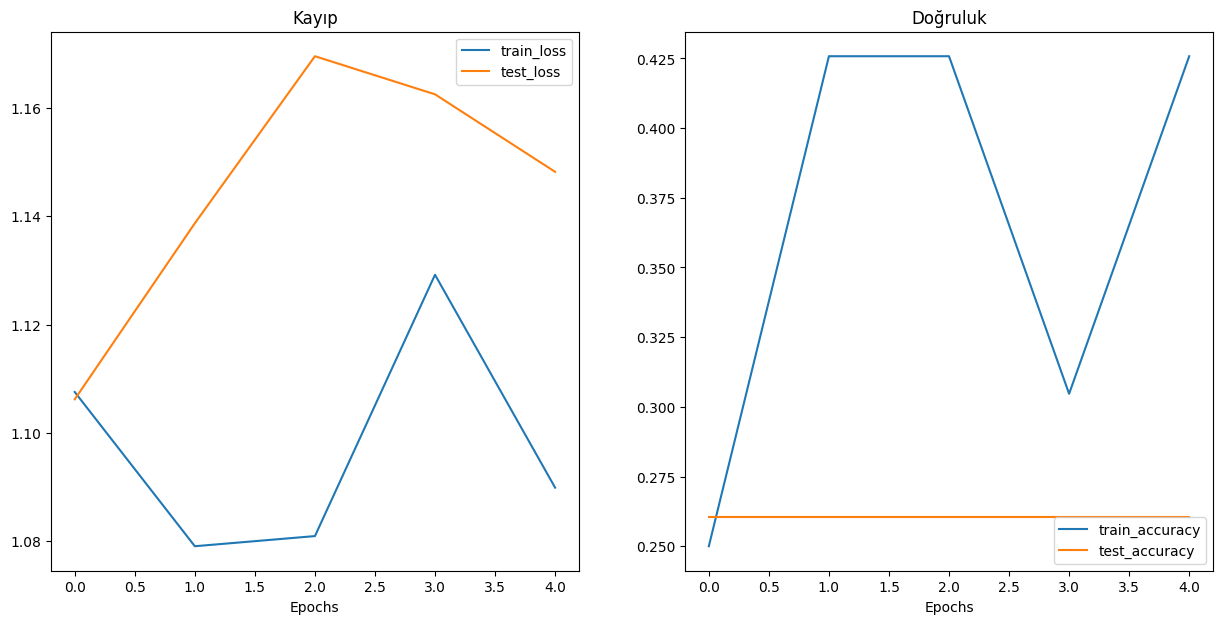

In [61]:
plot_loss_curves(model_1_results)


Vay...

Bunlar da pek iyi görünmüyor...

Modelimiz **yetersiz uyum sağlıyor** mu yoksa **aşırı uyum sağlıyor** mu?

Yoksa her ikisi de mi?

İdeal olarak, daha yüksek doğruluk ve daha düşük kayıp elde etmek istemez miyiz?

Bunu başarmak için hangi yöntemleri deneyebilirsiniz?


## 10. Model Sonuçlarını Karşılaştırma

Modellerimiz oldukça kötü performans gösteriyor olsa da, yine de onları karşılaştırmak için kod yazabiliriz.

İlk olarak, model sonuçlarımızı pandas DataFrame'lerine dönüştürelim.


In [62]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df


,train_loss,train_acc,test_loss,test_acc
0,1.107836,0.257812,1.136208,0.260417
1,1.084645,0.425781,1.162171,0.197917
2,1.115261,0.292969,1.169489,0.197917
3,1.099015,0.289062,1.134302,0.197917
4,1.098966,0.292969,1.143425,0.197917


Ve şimdi, `model_0` ve `model_1` sonuçlarını birlikte görselleştirmek için `matplotlib` kullanarak bazı grafikleme kodları yazabiliriz.


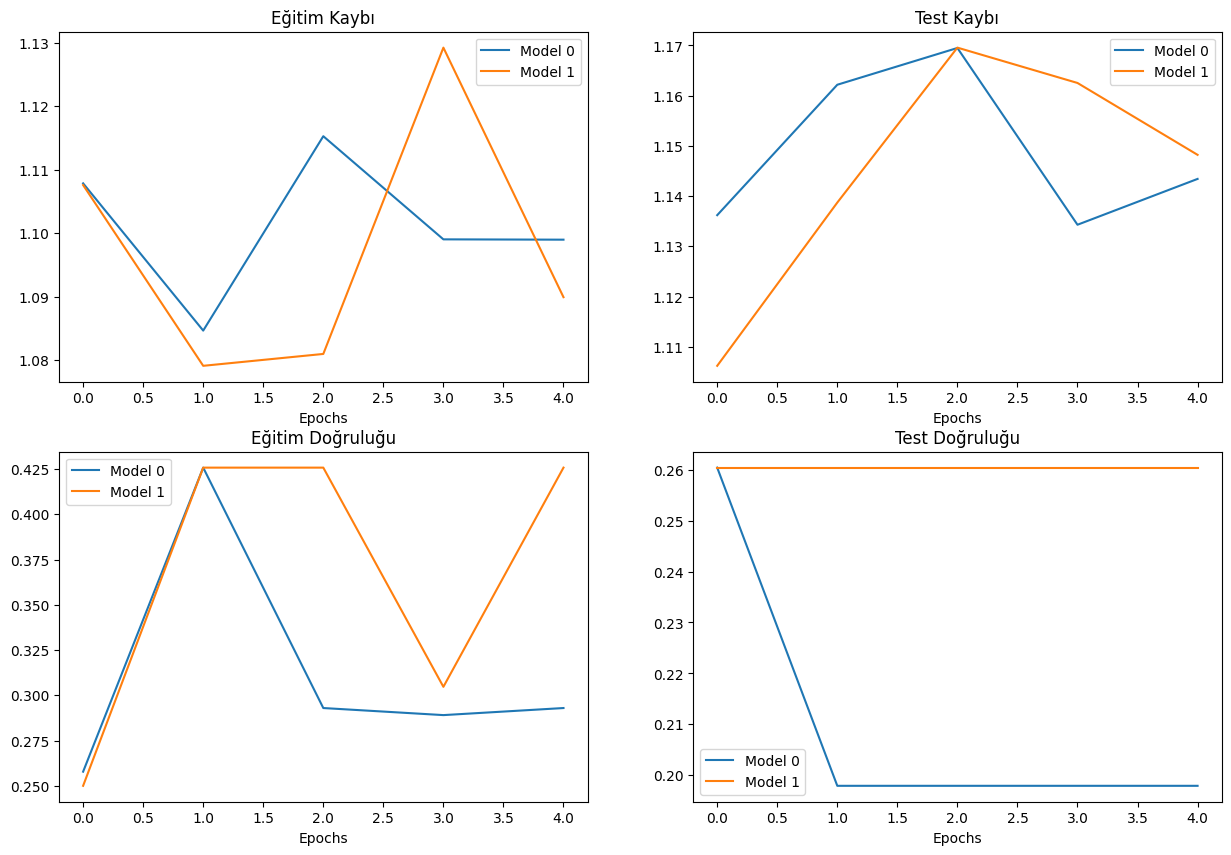

In [63]:
# Grafik oluşturma
plt.figure(figsize=(15, 10))

# Epoch sayısını al
epochs = range(len(model_0_df))

# Eğitim kaybını çiz
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Eğitim Kaybı")
plt.xlabel("Epochs")
plt.legend()

# Test kaybını çiz
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Kaybı")
plt.xlabel("Epochs")
plt.legend()

# Eğitim doğruluğunu çiz
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Eğitim Doğruluğu")
plt.xlabel("Epochs")
plt.legend()

# Test doğruluğunu çiz
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Doğruluğu")
plt.xlabel("Epochs")
plt.legend();


Görünüşe göre modellerimiz her ikisi de eşit derecede kötü performans gösterdi ve biraz düzensizdi (metrikler keskin bir şekilde yukarı ve aşağı gidip geliyor).

Eğer `model_2`'yi inşa etseydiniz, performansı iyileştirmeye çalışmak için neyi farklı yapardınız?


## 11. Özel Bir Görüntü Üzerinde Tahmin Yapma

Bir model belirli bir veri kümesi üzerinde eğitildiyse, muhtemelen kendi özel verileriniz üzerinde tahmin yapmak istersiniz.

Bizim durumumuzda, çünkü modelimiz pizza, biftek ve suşi görüntüleri üzerinde eğitildi, modelimizi kendi görüntülerimiz üzerinde nasıl tahmin yapacak şekilde kullanabiliriz?

Bunu yapmak için, bir görüntü yükleyebiliriz ve sonra **modelimizin eğitildiği veri türüne uygun şekilde ön işleme yapmalıyız**.

Başka bir deyişle, kendi özel görüntümüzü tensöre dönüştürmemiz ve modelimize göndermeden önce doğru veri tipinde olduğundan emin olmamız gerekecek.

Başlangıç olarak, özel bir görüntü indirelim.

Modelimiz bir görüntünün pizza, biftek veya suşi içerip içermediğini tahmin ettiği için, [Learn PyTorch for Deep Learning GitHub'dan babamın büyük bir pizzaya iki parmak yukarı verdiği fotoğrafı](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg) indirelim.

Bu görüntüyü Python'un `requests` modülünü kullanarak indireceğiz.

> **Not:** Eğer Google Colab kullanıyorsanız, sol menüye gidip -> Dosyalar -> Oturum depolamasına yükleyerek bir görüntü de yükleyebilirsiniz. Ancak, bu görüntü Google Colab oturumunuz sona erdiğinde silinecektir.


In [64]:
# Özel Görüntüyü İndirme
import requests

# Özel görüntü yolu
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Görüntü zaten yoksa indir
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # GitHub'dan indirirken, "ham" dosya bağlantısını kullanmak gerekir
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"{custom_image_path} indiriliyor...")
        f.write(request.content)
else:
    print(f"{custom_image_path} zaten var, indirme atlanıyor.")


data/04-pizza-dad.jpeg indiriliyor...


### 11.1 PyTorch ile Özel Bir Görüntü Yükleme

Harika!

Görünüşe göre `data/04-pizza-dad.jpeg` yolunda indirilen ve kullanıma hazır bir özel görüntümüz var.

Şimdi bunu yükleme zamanı.

PyTorch'un `torchvision` kütüphanesi, görüntüleri ve videoları okuma ve yazma için birkaç giriş ve çıkış ("IO" veya kısaca "io") metoduna sahiptir: [`torchvision.io`](https://pytorch.org/vision/stable/io.html).

Bir görüntü yüklemek istediğimiz için, [`torchvision.io.read_image()`](https://pytorch.org/vision/stable/generated/torchvision.io.read_image.html#torchvision.io.read_image) metodunu kullanacağız.

Bu metod, bir JPEG veya PNG görüntüsünü okuyacak ve onu `uint8` veri tipiyle `[0, 255]` aralığında değerler içeren 3 boyutlu bir RGB veya gri tonlama `torch.Tensor`'a dönüştürecek.

Hadi bunu deneyelim.


In [65]:
import torchvision

# Özel görüntüyü oku
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Görüntü verilerini yazdır
print(f"Özel görüntü tensörü:\n{custom_image_uint8}\n")
print(f"Özel görüntü şekli: {custom_image_uint8.shape}\n")
print(f"Özel görüntü veri tipi: {custom_image_uint8.dtype}")


Özel görüntü tensörü:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Özel görüntü şekli: torch.Size([3, 4032, 3024])

Özel görüntü ve

Harika! Görünüşe göre görüntümüz tensör formatında, ancak bu görüntü formatı modelimizle uyumlu mu?

Bizim `custom_image` tensörümüzün veri tipi `torch.uint8` ve değerleri `[0, 255]` arasında.

Ancak modelimiz, `torch.float32` veri tipiyle ve `[0, 1]` arasında değerler alan görüntü tensörleri alır.

Bu yüzden, özel görüntümüzü modelimizle kullanmadan önce, **veri formatını modelimizin eğitildiği veriyle aynı formata dönüştürmemiz gerekecek**.

Bunu yapmazsak, modelimiz hata verecektir.


In [66]:
# uint8 formatındaki görüntü üzerinde tahmin yapmayı deneyin (bu hata verecektir)
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))


RuntimeError: Input type (unsigned char) and bias type (float) should be the same

Eğer modelimizin eğitildiği veri türünden farklı bir veri türündeki bir görüntü üzerinde tahmin yapmaya çalışırsak, şu hatayı alırız:

> `RuntimeError: Input type (torch.cuda.ByteTensor) and weight type (torch.cuda.FloatTensor) should be the same`

Bunu, özel görüntümüzü modelimizin eğitildiği veri türüyle aynı veri türüne (`torch.float32`) dönüştürerek düzeltebiliriz.


In [67]:
# Özel görüntüyü yükle ve tensör değerlerini float32'ye dönüştür
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Görüntü piksel değerlerini [0, 1] arasında almak için 255'e böl
custom_image = custom_image / 255.

# Görüntü verilerini yazdır
print(f"Özel görüntü tensörü:\n{custom_image}\n")
print(f"Özel görüntü şekli: {custom_image.shape}\n")
print(f"Özel görüntü veri tipi: {custom_image.dtype}")


Özel görüntü tensörü:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  .

### 11.2 Eğitimli Bir PyTorch Modeli ile Özel Görüntüler Üzerinde Tahmin Yapma

Harika, görünüyor ki görüntü verimiz artık modelimizin eğitildiği aynı formatta.

Bir tek şey dışında...

O da `shape` (şekil).

Modelimiz `[3, 64, 64]` şekline sahip görüntülerle eğitildi, ancak özel görüntümüz şu anda `[3, 4032, 3024]` şekline sahip.

Özel görüntümüzün modelimizin eğitildiği görüntülerle aynı şekle sahip olmasını nasıl sağlarız?

Bize yardımcı olabilecek herhangi bir `torchvision.transforms` var mı?

Bu soruyu yanıtlamadan önce, görüntünün doğru göründüğünden emin olmak için `matplotlib` ile görüntüyü çizelim. Unutmayın, `matplotlib`'in gereksinimlerini karşılamak için boyutları `CHW`'den `HWC`'ye permütasyon yapmamız gerekecek.


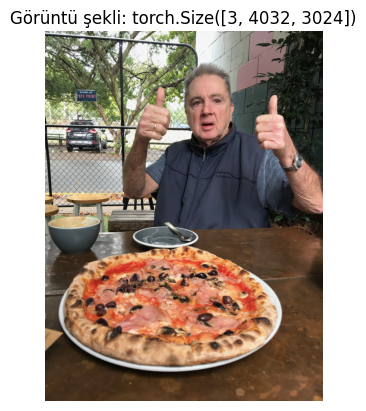

In [68]:
# Özel görüntüyü çiz
plt.imshow(custom_image.permute(1, 2, 0)) # Görüntü boyutlarını CHW -> HWC'ye permütasyon yapmamız gerekiyor, aksi takdirde matplotlib hata verecektir
plt.title(f"Görüntü şekli: {custom_image.shape}")
plt.axis(False);


İki parmak yukarı!

Peki, görüntümüzü modelimizin eğitildiği görüntülerle aynı boyuta nasıl getirebiliriz?

Bunu yapmanın bir yolu, `torchvision.transforms.Resize()` kullanmaktır.

Hadi, bunu yapmak için bir dönüşüm boru hattı oluşturalım.


In [69]:
# Görüntüyü yeniden boyutlandırmak için dönüşüm boru hattı oluştur
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Hedef görüntüyü dönüştür
custom_image_transformed = custom_image_transform(custom_image)

# Orijinal şekli ve yeni şekli yazdır
print(f"Orijinal şekil: {custom_image.shape}")
print(f"Yeni şekil: {custom_image_transformed.shape}")


Orijinal şekil: torch.Size([3, 4032, 3024])
Yeni şekil: torch.Size([3, 64, 64])


Vay!

Sonunda, kendi özel görüntümüz üzerinde bir tahmin yapalım.


In [70]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

Aman Tanrım...

Hazırlıklarımıza rağmen, özel görüntümüz ve modelimiz farklı cihazlarda.

Ve şu hatayı alıyoruz:

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper___slow_conv2d_forward)`

Bunu, `custom_image_transformed`'i hedef cihaza göndererek düzeltebiliriz.


In [71]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

Şimdi ne yapacağız?

Görünüşe göre bir şekil hatası alıyoruz.

Bu neden olabilir?

Özel görüntümüzü, modelimizin eğitildiği görüntülerle aynı boyutta hale getirdik...

Ah, bekleyin...

Unuttuğumuz bir boyut var.

Batch boyutu.

Modelimiz, görüntü tensörlerinin başında bir batch boyutu boyutu (`NCHW`, burada `N` batch boyutudur) bekliyor.

Ancak özel görüntümüz şu anda sadece `CHW`.

Bir batch boyutu boyutu eklemek için `torch.unsqueeze(dim=0)` kullanarak görüntümüze bir ekstra boyut ekleyebiliriz ve *nihayet* bir tahmin yapabiliriz.

Temelde, modelimize tek bir görüntü üzerinde tahmin yapmasını söylüyoruz (batch boyutu 1 olan bir görüntü).


In [72]:
model_1.eval()
with torch.inference_mode():
    # Görüntüye ekstra bir boyut ekle
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Farklı şekilleri yazdır
    print(f"Özel görüntü dönüştürülmüş şekli: {custom_image_transformed.shape}")
    print(f"Ekstra boyut eklenmiş özel görüntü şekli: {custom_image_transformed_with_batch_size.shape}")

    # Ekstra boyutlu görüntü üzerinde tahmin yap
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))


Özel görüntü dönüştürülmüş şekli: torch.Size([3, 64, 64])
Ekstra boyut eklenmiş özel görüntü şekli: torch.Size([1, 3, 64, 64])


Evet!!!

Görünüşe göre işe yaradı!

> **Not:** Şimdi geçtiğimiz üç klasik ve en yaygın derin öğrenme ve PyTorch sorunlarına göz atmış olduk:
> 1. **Yanlış veri tipleri** - modelimiz `torch.float32` bekliyordu, ancak orijinal özel görüntümüz `uint8` idi.
> 2. **Yanlış cihaz** - modelimiz hedef `device`'te (bizim durumumuzda GPU) bulunuyordu, ancak hedef verimiz henüz hedef `device`'e taşınmamıştı.
> 3. **Yanlış şekiller** - modelimiz, şekli `[N, C, H, W]` veya `[batch_size, color_channels, height, width]` olan bir giriş görüntüsü bekliyordu, ancak özel görüntü tensörümüz `[color_channels, height, width]` şeklindeydi.
>
> Unutmayın, bu hatalar sadece özel görüntüler üzerinde tahmin yaparken karşınıza çıkmaz.
>
> Çalıştığınız neredeyse her tür veri tipi (metin, ses, yapılandırılmış veri) ve problemle karşılaşabilirsiniz.

Şimdi modelimizin tahminlerine bir göz atalım.


In [73]:
custom_image_pred


tensor([[ 0.1188,  0.0339, -0.1486]])

Tamam, bunlar hala *logit formunda* (bir modelin ham çıktıları logit olarak adlandırılır).

Şimdi bunları logits -> tahmin olasılıkları -> tahmin etiketlerine dönüştürelim.


In [74]:
# Tahmin logitlerini yazdır
print(f"Tahmin logit'leri: {custom_image_pred}")

# Logit'leri -> tahmin olasılıklarına dönüştür (çok sınıflı sınıflandırma için torch.softmax() kullanarak)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Tahmin olasılıkları: {custom_image_pred_probs}")

# Tahmin olasılıklarını -> tahmin etiketlerine dönüştür
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Tahmin etiketi: {custom_image_pred_label}")


Tahmin logit'leri: tensor([[ 0.1188,  0.0339, -0.1486]])
Tahmin olasılıkları: tensor([[0.3726, 0.3422, 0.2852]])
Tahmin etiketi: tensor([0])


Tamam!

Güzel görünüyor.

Ama tabii ki tahmin etiketimiz hala indeks/tensör formunda.

Bunu, `class_names` listesinde indeksleme yaparak bir string sınıf adı tahminine dönüştürebiliriz.


In [75]:
# Tahmin edilen etiketi bul
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # tahmin etiketini CPU'ya taşı, aksi takdirde hata verir
custom_image_pred_class


'pizza'

Vay.

Model, değerlendirme metriklerimize göre kötü performans gösterse de tahminini doğru yapmış gibi görünüyor.

> **Not:** Model, mevcut haliyle verilen herhangi bir görüntü için "pizza", "biftek" veya "suşi" tahmini yapar. Eğer modelinizin farklı bir sınıf üzerinde tahmin yapmasını istiyorsanız, bunu yapması için eğitmeniz gerekecek.

Ancak, `custom_image_pred_probs`'u kontrol edersek, modelin her sınıfa neredeyse eşit ağırlık verdiğini (değerlerin benzer olduğunu) fark edeceğiz.


In [76]:
# Tahmin olasılıklarının değerleri oldukça benzer
custom_image_pred_probs


tensor([[0.3726, 0.3422, 0.2852]])

Tahmin olasılıklarının bu kadar benzer olması birkaç şeye işaret edebilir:
1. Model, üç sınıfı aynı anda tahmin etmeye çalışıyor (pizza, biftek ve suşi içeren bir görüntü olabilir).
2. Model, ne tahmin etmek istediğini gerçekten bilmiyor ve bunun yerine her bir sınıfa benzer değerler atıyor.

Bizim durumumuz ise 2. seçenek, çünkü modelimiz kötü eğitildiği için aslında *tahmin ediyor*.


### 11.3 Özel Görüntü Tahminini Bir Araya Getirmek: Bir Fonksiyon Oluşturma

Yukarıdaki adımları, her seferinde özel bir görüntü üzerinde tahmin yapmak istediğinizde tekrar tekrar yapmak oldukça zahmetli olacaktır.

Bu yüzden hepsini bir araya getirerek kolayca tekrar tekrar kullanabileceğimiz bir fonksiyon haline getirelim.

Özellikle, aşağıdaki adımları gerçekleştiren bir fonksiyon oluşturalım:
1. Hedef görüntü yolunu alır ve modelimize uygun veri tipine (`torch.float32`) dönüştürür.
2. Hedef görüntü piksel değerlerinin `[0, 1]` aralığında olmasını sağlar.
3. Gerekirse hedef görüntüyü dönüştürür.
4. Modelin hedef cihazda olduğundan emin olur.
5. Eğitimli model ile hedef görüntü üzerinde tahmin yapar (görüntünün doğru boyutta ve modelle aynı cihazda olduğundan emin olarak).
6. Modelin çıktısını logitlerden tahmin olasılıklarına dönüştürür.
7. Tahmin olasılıklarını tahmin etiketlerine dönüştürür.
8. Hedef görüntüyü model tahmini ve tahmin olasılığıyla birlikte çizer.

Biraz fazla adım var ama bunu başaracağız!


In [77]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Hedef bir görüntü üzerinde tahmin yapar ve görüntüyü tahmini ile birlikte çizer."""

    # 1. Görüntüyü yükle ve tensör değerlerini float32'ye dönüştür
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Görüntü piksel değerlerini 255'e bölerek [0, 1] aralığına getirin
    target_image = target_image / 255.

    # 3. Gerekirse dönüştürme işlemi yap
    if transform:
        target_image = transform(target_image)

    # 4. Modelin hedef cihazda olduğundan emin olun
    model.to(device)

    # 5. Modeli değerlendirme moduna ve çıkarım moduna alın
    model.eval()
    with torch.inference_mode():
        # Görüntüye ekstra bir boyut ekleyin
        target_image = target_image.unsqueeze(dim=0)

        # Ekstra boyutlu görüntü üzerinde tahmin yapın ve hedef cihaza gönderin
        target_image_pred = model(target_image.to(device))

    # 6. Logit'leri -> tahmin olasılıklarına dönüştürün (çok sınıflı sınıflandırma için torch.softmax() kullanarak)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Tahmin olasılıklarını -> tahmin etiketlerine dönüştürün
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Görüntüyü tahmin ve tahmin olasılığı ile birlikte çizin
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # matplotlib için doğru boyutta olduğundan emin olun
    if class_names:
        title = f"Tahmin: {class_names[target_image_pred_label.cpu()]} | Olasılık: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Tahmin: {target_image_pred_label} | Olasılık: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);


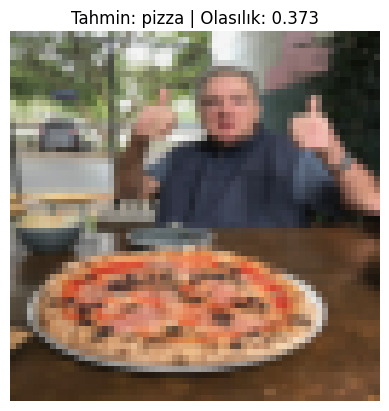

In [78]:
# Özel görüntümüz üzerinde tahmin yap
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)


Yine iki parmak yukarı!

Görünüşe göre modelimiz, sadece tahmin yaparak doğru tahmin yaptı.

Ancak bu, diğer görüntülerle her zaman böyle olmayacak...

Ayrıca, görüntü `[64, 64]` boyutuna küçültüldüğü için piksellenmiş durumda, bunu `custom_image_transform` ile yaptık.

> **Egzersiz:** Kendi pizza, biftek veya suşi görüntülerinizden biriyle bir tahmin yapmayı deneyin ve ne olduğunu görün.


## Ana Çıkarımlar

Bu modülde oldukça fazla şey ele aldık.

Bunu birkaç madde ile özetleyelim.

* PyTorch, görsel veriden metne, ses verisinden öneri sistemlerine kadar her türlü veriyi işlemek için bir çok yerleşik fonksiyona sahiptir.
* Eğer PyTorch'un yerleşik veri yükleme fonksiyonları ihtiyaçlarınıza uymazsa, `torch.utils.data.Dataset` sınıfını alt sınıflandırarak kendi özel veri kümelerinizi oluşturmak için kod yazabilirsiniz.
* PyTorch'taki `torch.utils.data.DataLoader`'lar, `Dataset`'lerinizi eğitim ve test sırasında kullanılabilen yinelemelere dönüştürmeye yardımcı olur.
* Makine öğreniminin büyük bir kısmı, **aşırı uyum (overfitting)** ve **yetersiz uyum (underfitting)** arasındaki dengeyi sağlamaktır (her ikisi için de farklı yöntemleri yukarıda tartıştık, bu yüzden iyi bir egzersiz, daha fazla araştırma yapmak ve farklı teknikleri denemek için kod yazmak olacaktır).
* Eğitimli bir modelle kendi özel verileriniz üzerinde tahmin yapmak mümkündür, yeter ki veriyi modelin eğitildiği formata benzer bir formatta düzenleyin. PyTorch ve derin öğrenme ile ilgili üç büyük hatayı göz önünde bulundurduğunuzdan emin olun:
    1. **Yanlış veri tipleri** - Modeliniz `torch.float32` bekliyordu ancak veriniz `torch.uint8` idi.
    2. **Yanlış veri şekilleri** - Modeliniz `[batch_size, color_channels, height, width]` bekliyordu, ancak veriniz `[color_channels, height, width]` idi.
    3. **Yanlış cihazlar** - Modeliniz GPU'da ancak veriniz CPU'da bulunuyor.
